In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [3]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [4]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [5]:
data1a = np.array(strtoeval1(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt')))
data1alabel = np.array(strtoeval2(readfile(r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt')))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(data1a, data1alabel)


In [6]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

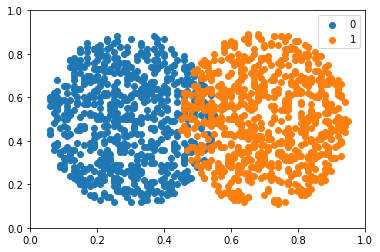

In [7]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [9]:
backend = Aer.get_backend('qasm_simulator')

nparam=1200;

theta=[];
for y in range(8):
    theta.append(2*pi*random.random())

def lossCal(i,theta):    
    #i th data
    #parameter
    #return loss
    nshot=3000;
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.rx(a_shuffled[i][0],qr[2])
    qc.rx(a_shuffled[i][1],qr[3])

    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])

    qc=circuit1(qc,qr,theta,1,0)    

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'0000')+cN(count,'0001')+cN(count,'0010')+cN(count,'0011')+cN(count,'1100')+cN(count,'1101')+cN(count,'1110')+cN(count,'1111'))
    lp=1*(cN(count,'0100')+cN(count,'0101')+cN(count,'0110')+cN(count,'0111')+cN(count,'1000')+cN(count,'1001')+cN(count,'1010')+cN(count,'1011'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1


## SPAS method

$$ \frac{\partial L}{\partial \theta_j}= \frac{L(\theta_j+c)-L(\theta_j+c)}{2 \Delta}$$

In [11]:
#
def SPSA(i,th,c1,delta):
    sp=[]
    c=[]
    for x1 in range(8):
        c.append(c1)

    for x1 in range(8):
        sp.append((lossCal(i,th+np.array(c))-lossCal(i,th-np.array(c)))/(2*delta))

    return sp


## nshot=1000

In [ ]:
progress=[];
theta=[];
thdata=[];
for y in range(8):
    theta.append(2*pi*random.random())    
c1=0.01   
delta=6
theta=np.array(theta)+SPSA(i,theta,c1,delta)
for ep in range(1000):
    for i in range(900):
        theta=theta+SPSA(i,theta,c1,delta)
        print(lossCal(i,theta))
        progress.append(lossCal(i,theta))
        thdata.append(theta)

In [ ]:
plt.plot(progress)

## Single data

In [12]:
progress=[];
theta=[0,0,0,0,0,0,0,0];
thdata=[];
c1=0.01;   
delta=6;
theta=np.array(theta)-SPSA(1,theta,c1,delta)
for ep in range(10000):
    delta=random.random()+0.3
    theta=theta-SPSA(1,theta,c1,delta)
    print("L=",np.round(lossCal(1,theta),2),"th=",np.round(theta,3)," iter=",ep)
    progress.append(lossCal(1,theta))
    thdata.append(theta)

L= 1.42 th= [ 0.005 -0.004  0.002  0.005  0.006 -0.02  -0.01  -0.013]  iter= 0
L= 1.42 th= [-0.006 -0.063 -0.03   0.053  0.018 -0.086  0.008  0.017]  iter= 1
L= 1.39 th= [ 0.022 -0.052 -0.02   0.041  0.027 -0.084  0.012  0.   ]  iter= 2
L= 1.39 th= [ 0.004 -0.059 -0.018  0.015  0.013 -0.058  0.017 -0.009]  iter= 3
L= 1.41 th= [-0.007 -0.073 -0.021  0.012  0.001 -0.051  0.039  0.008]  iter= 4
L= 1.39 th= [-0.007 -0.073 -0.024  0.024  0.006 -0.045  0.035  0.006]  iter= 5
L= 1.39 th= [ 0.011 -0.097 -0.031  0.032 -0.028 -0.053  0.032  0.009]  iter= 6
L= 1.41 th= [ 0.014 -0.089  0.014  0.026 -0.037 -0.048  0.006 -0.001]  iter= 7
L= 1.39 th= [ 0.02  -0.094  0.015  0.023 -0.047 -0.032  0.     0.011]  iter= 8
L= 1.41 th= [ 0.02  -0.1    0.008  0.012 -0.059 -0.023 -0.008 -0.001]  iter= 9
L= 1.43 th= [ 0.018 -0.108 -0.003 -0.014 -0.066 -0.02   0.018 -0.01 ]  iter= 10
L= 1.4 th= [ 0.017 -0.136 -0.016  0.009 -0.067 -0.036  0.043 -0.019]  iter= 11
L= 1.39 th= [-0.039 -0.14  -0.051 -0.03  -0.062 -0.

L= 1.33 th= [-0.338 -0.752 -0.503 -0.233 -0.643 -0.421 -0.486 -0.588]  iter= 103
L= 1.31 th= [-0.331 -0.744 -0.525 -0.256 -0.695 -0.461 -0.555 -0.598]  iter= 104
L= 1.26 th= [-0.319 -0.754 -0.549 -0.268 -0.698 -0.479 -0.569 -0.601]  iter= 105
L= 1.26 th= [-0.324 -0.752 -0.542 -0.259 -0.717 -0.466 -0.574 -0.618]  iter= 106
L= 1.27 th= [-0.341 -0.76  -0.547 -0.275 -0.722 -0.457 -0.572 -0.618]  iter= 107
L= 1.26 th= [-0.351 -0.756 -0.55  -0.294 -0.716 -0.46  -0.585 -0.598]  iter= 108
L= 1.27 th= [-0.354 -0.77  -0.551 -0.3   -0.706 -0.465 -0.601 -0.601]  iter= 109
L= 1.26 th= [-0.333 -0.784 -0.548 -0.298 -0.689 -0.485 -0.587 -0.607]  iter= 110
L= 1.27 th= [-0.392 -0.851 -0.498 -0.259 -0.715 -0.501 -0.646 -0.641]  iter= 111
L= 1.31 th= [-0.37  -0.878 -0.488 -0.252 -0.71  -0.436 -0.723 -0.692]  iter= 112
L= 1.3 th= [-0.371 -0.875 -0.513 -0.276 -0.678 -0.404 -0.716 -0.728]  iter= 113
L= 1.28 th= [-0.434 -0.875 -0.522 -0.269 -0.672 -0.4   -0.765 -0.742]  iter= 114
L= 1.27 th= [-0.487 -0.893 -0

L= 1.2 th= [-1.412 -1.258 -0.711 -0.571 -1.034 -0.934 -1.276 -1.386]  iter= 205
L= 1.18 th= [-1.412 -1.251 -0.689 -0.557 -1.075 -0.957 -1.301 -1.395]  iter= 206
L= 1.2 th= [-1.398 -1.221 -0.703 -0.549 -1.095 -0.932 -1.294 -1.398]  iter= 207
L= 1.2 th= [-1.46  -1.229 -0.721 -0.564 -1.122 -0.881 -1.239 -1.389]  iter= 208
L= 1.19 th= [-1.458 -1.242 -0.722 -0.596 -1.096 -0.903 -1.232 -1.376]  iter= 209
L= 1.17 th= [-1.454 -1.24  -0.731 -0.607 -1.118 -0.93  -1.269 -1.37 ]  iter= 210
L= 1.18 th= [-1.472 -1.253 -0.747 -0.6   -1.171 -0.988 -1.253 -1.417]  iter= 211
L= 1.14 th= [-1.459 -1.236 -0.745 -0.604 -1.168 -0.993 -1.237 -1.425]  iter= 212
L= 1.17 th= [-1.452 -1.253 -0.727 -0.603 -1.172 -0.982 -1.236 -1.414]  iter= 213
L= 1.19 th= [-1.454 -1.247 -0.733 -0.613 -1.183 -0.982 -1.245 -1.42 ]  iter= 214
L= 1.13 th= [-1.462 -1.251 -0.735 -0.637 -1.185 -0.986 -1.255 -1.413]  iter= 215
L= 1.16 th= [-1.453 -1.254 -0.726 -0.653 -1.186 -0.995 -1.274 -1.422]  iter= 216
L= 1.16 th= [-1.48  -1.267 -0.7

L= 1.01 th= [-2.059 -1.717 -1.306 -1.142 -1.889 -1.048 -1.734 -1.474]  iter= 307
L= 1.03 th= [-2.097 -1.732 -1.33  -1.153 -1.886 -1.054 -1.74  -1.473]  iter= 308
L= 0.99 th= [-2.136 -1.702 -1.363 -1.185 -1.886 -1.079 -1.734 -1.466]  iter= 309
L= 0.98 th= [-2.116 -1.698 -1.376 -1.219 -1.904 -1.046 -1.742 -1.476]  iter= 310
L= 1.0 th= [-2.076 -1.678 -1.351 -1.211 -1.91  -1.046 -1.742 -1.459]  iter= 311
L= 0.99 th= [-2.088 -1.707 -1.387 -1.211 -1.909 -1.084 -1.753 -1.455]  iter= 312
L= 0.99 th= [-2.087 -1.73  -1.394 -1.234 -1.921 -1.089 -1.76  -1.441]  iter= 313
L= 0.98 th= [-2.099 -1.721 -1.399 -1.206 -1.932 -1.103 -1.768 -1.431]  iter= 314
L= 1.01 th= [-2.099 -1.714 -1.398 -1.204 -1.945 -1.045 -1.748 -1.401]  iter= 315
L= 1.01 th= [-2.048 -1.736 -1.447 -1.187 -1.948 -0.966 -1.736 -1.409]  iter= 316
L= 1.03 th= [-2.047 -1.727 -1.448 -1.205 -1.959 -0.961 -1.74  -1.402]  iter= 317
L= 1.0 th= [-2.051 -1.739 -1.447 -1.222 -1.979 -0.964 -1.751 -1.403]  iter= 318
L= 0.97 th= [-2.042 -1.765 -1.

L= 0.99 th= [-1.949 -2.056 -1.524 -1.252 -1.912 -0.919 -1.506 -1.599]  iter= 409
L= 1.0 th= [-1.936 -2.065 -1.519 -1.263 -1.901 -0.948 -1.492 -1.592]  iter= 410
L= 1.01 th= [-1.941 -2.067 -1.514 -1.256 -1.886 -0.944 -1.5   -1.601]  iter= 411
L= 0.98 th= [-1.954 -2.071 -1.536 -1.277 -1.894 -0.943 -1.493 -1.581]  iter= 412
L= 0.99 th= [-1.954 -2.    -1.511 -1.245 -1.904 -0.942 -1.494 -1.617]  iter= 413
L= 0.95 th= [-1.965 -1.962 -1.494 -1.252 -1.889 -0.956 -1.464 -1.628]  iter= 414
L= 1.0 th= [-1.994 -1.947 -1.463 -1.234 -1.9   -0.946 -1.456 -1.618]  iter= 415
L= 0.99 th= [-1.955 -1.985 -1.502 -1.249 -1.888 -0.935 -1.439 -1.617]  iter= 416
L= 0.97 th= [-1.964 -2.021 -1.521 -1.23  -1.87  -0.928 -1.462 -1.619]  iter= 417
L= 0.99 th= [-2.016 -1.959 -1.527 -1.181 -1.873 -0.962 -1.475 -1.622]  iter= 418
L= 0.95 th= [-2.021 -1.955 -1.537 -1.192 -1.855 -0.961 -1.472 -1.634]  iter= 419
L= 0.99 th= [-2.026 -1.928 -1.549 -1.2   -1.855 -0.962 -1.466 -1.621]  iter= 420
L= 1.01 th= [-2.012 -1.908 -1.

L= 0.98 th= [-2.136 -2.372 -1.558 -1.122 -1.971 -1.138 -1.785 -1.705]  iter= 511
L= 0.97 th= [-2.165 -2.337 -1.545 -1.184 -1.993 -1.134 -1.818 -1.697]  iter= 512
L= 0.98 th= [-2.187 -2.366 -1.541 -1.207 -1.986 -1.15  -1.816 -1.692]  iter= 513
L= 1.0 th= [-2.198 -2.373 -1.543 -1.206 -2.013 -1.164 -1.824 -1.701]  iter= 514
L= 0.98 th= [-2.191 -2.381 -1.519 -1.216 -2.005 -1.151 -1.825 -1.705]  iter= 515
L= 1.02 th= [-2.19  -2.376 -1.545 -1.239 -2.024 -1.16  -1.842 -1.688]  iter= 516
L= 1.0 th= [-2.2   -2.373 -1.544 -1.227 -2.032 -1.146 -1.846 -1.692]  iter= 517
L= 1.0 th= [-2.192 -2.364 -1.541 -1.201 -2.009 -1.114 -1.785 -1.728]  iter= 518
L= 0.99 th= [-2.215 -2.339 -1.56  -1.176 -2.037 -1.109 -1.808 -1.736]  iter= 519
L= 0.99 th= [-2.2   -2.332 -1.524 -1.211 -2.075 -1.084 -1.817 -1.781]  iter= 520
L= 1.0 th= [-2.21  -2.31  -1.508 -1.211 -2.089 -1.109 -1.8   -1.78 ]  iter= 521
L= 0.99 th= [-2.248 -2.338 -1.531 -1.168 -2.061 -1.112 -1.83  -1.801]  iter= 522
L= 0.97 th= [-2.248 -2.358 -1.53

L= 0.99 th= [-2.169 -2.336 -1.41  -1.29  -2.009 -1.054 -1.725 -1.914]  iter= 613
L= 0.98 th= [-2.165 -2.35  -1.437 -1.302 -2.026 -1.087 -1.756 -1.948]  iter= 614
L= 0.96 th= [-2.166 -2.344 -1.488 -1.361 -2.024 -1.021 -1.769 -1.946]  iter= 615
L= 1.04 th= [-2.151 -2.345 -1.452 -1.394 -2.049 -1.011 -1.792 -1.933]  iter= 616
L= 1.01 th= [-2.152 -2.339 -1.452 -1.404 -2.055 -1.035 -1.776 -1.93 ]  iter= 617
L= 1.0 th= [-2.154 -2.324 -1.456 -1.416 -2.025 -1.034 -1.821 -1.937]  iter= 618
L= 1.01 th= [-2.164 -2.333 -1.477 -1.414 -2.036 -1.041 -1.822 -1.926]  iter= 619
L= 1.0 th= [-2.189 -2.352 -1.492 -1.427 -2.029 -1.035 -1.816 -1.931]  iter= 620
L= 1.0 th= [-2.204 -2.341 -1.501 -1.43  -2.008 -1.04  -1.799 -1.903]  iter= 621
L= 0.98 th= [-2.21  -2.318 -1.488 -1.475 -1.98  -0.989 -1.761 -1.906]  iter= 622
L= 1.01 th= [-2.23  -2.337 -1.495 -1.473 -1.974 -0.975 -1.743 -1.903]  iter= 623
L= 0.99 th= [-2.213 -2.319 -1.494 -1.454 -1.997 -0.976 -1.75  -1.904]  iter= 624
L= 1.0 th= [-2.186 -2.34  -1.49

L= 0.98 th= [-2.356 -2.242 -1.437 -1.436 -1.854 -0.902 -1.824 -2.178]  iter= 715
L= 1.0 th= [-2.358 -2.241 -1.438 -1.43  -1.855 -0.947 -1.821 -2.178]  iter= 716
L= 0.97 th= [-2.361 -2.238 -1.444 -1.455 -1.845 -0.926 -1.82  -2.167]  iter= 717
L= 1.02 th= [-2.368 -2.244 -1.442 -1.465 -1.841 -0.91  -1.825 -2.169]  iter= 718
L= 1.0 th= [-2.349 -2.222 -1.445 -1.471 -1.844 -0.897 -1.831 -2.177]  iter= 719
L= 0.97 th= [-2.318 -2.226 -1.44  -1.485 -1.853 -0.893 -1.844 -2.176]  iter= 720
L= 0.99 th= [-2.349 -2.242 -1.449 -1.448 -1.901 -0.908 -1.85  -2.156]  iter= 721
L= 1.01 th= [-2.403 -2.217 -1.453 -1.49  -1.916 -0.909 -1.931 -2.202]  iter= 722
L= 1.0 th= [-2.404 -2.186 -1.463 -1.483 -1.889 -0.888 -1.952 -2.198]  iter= 723
L= 1.0 th= [-2.39  -2.181 -1.427 -1.48  -1.842 -0.883 -1.938 -2.152]  iter= 724
L= 0.99 th= [-2.353 -2.16  -1.437 -1.483 -1.771 -0.867 -1.952 -2.176]  iter= 725
L= 0.98 th= [-2.344 -2.161 -1.418 -1.488 -1.758 -0.874 -1.948 -2.151]  iter= 726
L= 0.99 th= [-2.333 -2.162 -1.43

L= 1.01 th= [-2.259 -1.935 -1.463 -1.354 -2.323 -0.592 -2.067 -2.319]  iter= 817
L= 1.0 th= [-2.283 -1.949 -1.47  -1.345 -2.317 -0.588 -2.07  -2.311]  iter= 818
L= 1.0 th= [-2.295 -1.926 -1.488 -1.338 -2.276 -0.585 -2.088 -2.321]  iter= 819
L= 0.99 th= [-2.304 -1.91  -1.502 -1.333 -2.265 -0.554 -2.068 -2.32 ]  iter= 820
L= 0.99 th= [-2.303 -1.909 -1.487 -1.337 -2.244 -0.56  -2.069 -2.326]  iter= 821
L= 0.98 th= [-2.261 -1.872 -1.471 -1.321 -2.301 -0.579 -2.126 -2.271]  iter= 822
L= 1.01 th= [-2.243 -1.865 -1.457 -1.322 -2.32  -0.604 -2.131 -2.274]  iter= 823
L= 0.98 th= [-2.251 -1.84  -1.456 -1.293 -2.324 -0.615 -2.131 -2.275]  iter= 824
L= 1.02 th= [-2.234 -1.842 -1.466 -1.301 -2.351 -0.612 -2.105 -2.287]  iter= 825
L= 0.98 th= [-2.263 -1.833 -1.486 -1.307 -2.361 -0.596 -2.124 -2.288]  iter= 826
L= 0.99 th= [-2.263 -1.837 -1.483 -1.307 -2.383 -0.582 -2.12  -2.294]  iter= 827
L= 1.01 th= [-2.256 -1.826 -1.479 -1.308 -2.37  -0.598 -2.122 -2.31 ]  iter= 828
L= 1.0 th= [-2.159 -1.876 -1.4

L= 1.01 th= [-2.326 -2.178 -1.399 -1.159 -2.221 -0.438 -1.96  -2.492]  iter= 919
L= 1.01 th= [-2.265 -2.113 -1.442 -1.149 -2.215 -0.457 -1.925 -2.457]  iter= 920
L= 0.99 th= [-2.255 -2.16  -1.429 -1.122 -2.23  -0.497 -1.873 -2.425]  iter= 921
L= 1.01 th= [-2.259 -2.145 -1.429 -1.138 -2.246 -0.492 -1.845 -2.453]  iter= 922
L= 1.0 th= [-2.254 -2.129 -1.438 -1.137 -2.241 -0.494 -1.846 -2.46 ]  iter= 923
L= 1.01 th= [-2.286 -2.188 -1.413 -1.073 -2.258 -0.454 -1.848 -2.43 ]  iter= 924
L= 1.0 th= [-2.25  -2.177 -1.43  -1.077 -2.264 -0.453 -1.83  -2.414]  iter= 925
L= 1.01 th= [-2.252 -2.185 -1.446 -1.081 -2.249 -0.467 -1.845 -2.403]  iter= 926
L= 0.97 th= [-2.246 -2.186 -1.464 -1.094 -2.228 -0.464 -1.832 -2.398]  iter= 927
L= 0.95 th= [-2.248 -2.174 -1.468 -1.084 -2.231 -0.441 -1.841 -2.41 ]  iter= 928
L= 1.0 th= [-2.184 -2.171 -1.523 -1.057 -2.288 -0.474 -1.935 -2.42 ]  iter= 929
L= 0.98 th= [-2.218 -2.195 -1.506 -1.106 -2.239 -0.478 -1.926 -2.358]  iter= 930
L= 0.98 th= [-2.223 -2.226 -1.5

L= 0.98 th= [-2.225 -2.333 -1.74  -1.09  -2.134 -0.794 -1.638 -2.125]  iter= 1020
L= 0.96 th= [-2.233 -2.353 -1.698 -1.086 -2.118 -0.781 -1.604 -2.131]  iter= 1021
L= 0.95 th= [-2.268 -2.333 -1.689 -1.077 -2.1   -0.802 -1.603 -2.126]  iter= 1022
L= 0.98 th= [-2.286 -2.323 -1.698 -1.007 -2.108 -0.775 -1.587 -2.148]  iter= 1023
L= 0.99 th= [-2.304 -2.337 -1.699 -1.005 -2.093 -0.759 -1.595 -2.178]  iter= 1024
L= 0.95 th= [-2.298 -2.334 -1.701 -0.995 -2.077 -0.759 -1.577 -2.191]  iter= 1025
L= 0.96 th= [-2.292 -2.343 -1.719 -0.982 -2.053 -0.834 -1.57  -2.19 ]  iter= 1026
L= 0.97 th= [-2.283 -2.338 -1.712 -0.976 -2.044 -0.836 -1.586 -2.186]  iter= 1027
L= 0.96 th= [-2.231 -2.367 -1.688 -0.96  -2.044 -0.837 -1.561 -2.178]  iter= 1028
L= 0.96 th= [-2.268 -2.36  -1.688 -0.956 -2.062 -0.806 -1.576 -2.145]  iter= 1029
L= 0.96 th= [-2.254 -2.36  -1.683 -0.947 -2.06  -0.841 -1.585 -2.165]  iter= 1030
L= 0.93 th= [-2.241 -2.354 -1.699 -0.94  -2.056 -0.824 -1.591 -2.177]  iter= 1031
L= 0.94 th= [-2.

L= 0.87 th= [-2.025 -2.304 -2.081 -0.803 -1.936 -0.524 -1.622 -2.077]  iter= 1120
L= 0.88 th= [-2.019 -2.307 -2.07  -0.808 -1.93  -0.535 -1.634 -2.051]  iter= 1121
L= 0.87 th= [-2.021 -2.332 -2.068 -0.814 -1.945 -0.55  -1.624 -2.082]  iter= 1122
L= 0.86 th= [-1.998 -2.347 -2.081 -0.798 -1.928 -0.571 -1.618 -2.028]  iter= 1123
L= 0.87 th= [-2.008 -2.345 -2.086 -0.79  -1.938 -0.561 -1.626 -2.034]  iter= 1124
L= 0.85 th= [-2.015 -2.326 -2.072 -0.769 -1.933 -0.536 -1.62  -2.01 ]  iter= 1125
L= 0.88 th= [-1.959 -2.366 -2.03  -0.752 -1.928 -0.591 -1.651 -2.04 ]  iter= 1126
L= 0.92 th= [-1.935 -2.418 -2.013 -0.782 -1.899 -0.638 -1.661 -1.976]  iter= 1127
L= 0.89 th= [-1.929 -2.423 -2.012 -0.785 -1.908 -0.645 -1.664 -2.011]  iter= 1128
L= 0.87 th= [-1.92  -2.393 -2.014 -0.788 -1.877 -0.644 -1.688 -2.004]  iter= 1129
L= 0.9 th= [-1.908 -2.391 -1.996 -0.798 -1.882 -0.651 -1.666 -1.983]  iter= 1130
L= 0.91 th= [-1.914 -2.412 -2.042 -0.802 -1.887 -0.638 -1.633 -1.985]  iter= 1131
L= 0.88 th= [-1.8

L= 0.88 th= [-2.131 -2.823 -1.938 -0.575 -2.082 -0.625 -2.158 -1.709]  iter= 1221
L= 0.89 th= [-2.208 -2.881 -1.956 -0.57  -2.062 -0.621 -2.151 -1.684]  iter= 1222
L= 0.83 th= [-2.213 -2.887 -1.961 -0.562 -2.07  -0.628 -2.15  -1.687]  iter= 1223
L= 0.84 th= [-2.203 -2.883 -1.937 -0.571 -2.074 -0.633 -2.159 -1.674]  iter= 1224
L= 0.87 th= [-2.207 -2.886 -1.936 -0.567 -2.075 -0.599 -2.165 -1.68 ]  iter= 1225
L= 0.85 th= [-2.207 -2.837 -1.942 -0.493 -2.054 -0.587 -2.159 -1.609]  iter= 1226
L= 0.86 th= [-2.202 -2.846 -1.943 -0.495 -2.068 -0.595 -2.154 -1.636]  iter= 1227
L= 0.86 th= [-2.198 -2.834 -1.937 -0.485 -2.063 -0.597 -2.16  -1.647]  iter= 1228
L= 0.87 th= [-2.172 -2.855 -1.975 -0.457 -2.129 -0.567 -2.171 -1.617]  iter= 1229
L= 0.85 th= [-2.197 -2.862 -1.987 -0.482 -2.149 -0.549 -2.18  -1.63 ]  iter= 1230
L= 0.87 th= [-2.206 -2.868 -2.007 -0.498 -2.138 -0.502 -2.183 -1.653]  iter= 1231
L= 0.84 th= [-2.22  -2.867 -2.047 -0.53  -2.119 -0.519 -2.187 -1.666]  iter= 1232
L= 0.84 th= [-2.

L= 0.82 th= [-2.318 -3.042 -2.053 -0.339 -2.407 -0.425 -2.304 -2.04 ]  iter= 1321
L= 0.81 th= [-2.331 -2.993 -2.083 -0.363 -2.392 -0.401 -2.308 -2.059]  iter= 1322
L= 0.8 th= [-2.32  -2.98  -2.074 -0.411 -2.397 -0.399 -2.307 -2.035]  iter= 1323
L= 0.82 th= [-2.322 -2.98  -2.081 -0.419 -2.399 -0.369 -2.307 -2.021]  iter= 1324
L= 0.83 th= [-2.31  -2.968 -2.082 -0.428 -2.405 -0.379 -2.307 -2.011]  iter= 1325
L= 0.78 th= [-2.31  -2.951 -2.107 -0.43  -2.393 -0.384 -2.311 -2.015]  iter= 1326
L= 0.81 th= [-2.314 -2.944 -2.099 -0.434 -2.401 -0.356 -2.321 -2.022]  iter= 1327
L= 0.82 th= [-2.32  -2.937 -2.095 -0.439 -2.413 -0.364 -2.296 -2.008]  iter= 1328
L= 0.8 th= [-2.316 -2.928 -2.101 -0.44  -2.416 -0.356 -2.284 -2.015]  iter= 1329
L= 0.8 th= [-2.324 -2.921 -2.104 -0.382 -2.434 -0.353 -2.337 -2.029]  iter= 1330
L= 0.79 th= [-2.348 -2.93  -2.096 -0.376 -2.453 -0.355 -2.332 -2.021]  iter= 1331
L= 0.79 th= [-2.353 -2.92  -2.079 -0.365 -2.454 -0.347 -2.331 -2.011]  iter= 1332
L= 0.8 th= [-2.308 

L= 0.81 th= [-1.937 -2.725 -2.211 -0.538 -2.501 -0.461 -1.879 -2.111]  iter= 1422
L= 0.78 th= [-1.944 -2.721 -2.204 -0.516 -2.504 -0.449 -1.887 -2.113]  iter= 1423
L= 0.8 th= [-1.965 -2.719 -2.199 -0.516 -2.494 -0.462 -1.879 -2.112]  iter= 1424
L= 0.8 th= [-1.971 -2.731 -2.206 -0.531 -2.493 -0.468 -1.878 -2.108]  iter= 1425
L= 0.79 th= [-1.983 -2.708 -2.227 -0.515 -2.465 -0.452 -1.896 -2.09 ]  iter= 1426
L= 0.81 th= [-1.976 -2.702 -2.2   -0.53  -2.477 -0.473 -1.871 -2.096]  iter= 1427
L= 0.81 th= [-1.987 -2.709 -2.189 -0.521 -2.482 -0.476 -1.875 -2.089]  iter= 1428
L= 0.78 th= [-1.975 -2.726 -2.163 -0.501 -2.466 -0.485 -1.876 -2.074]  iter= 1429
L= 0.81 th= [-1.98  -2.759 -2.16  -0.502 -2.479 -0.461 -1.887 -2.053]  iter= 1430
L= 0.82 th= [-1.979 -2.771 -2.165 -0.502 -2.506 -0.459 -1.873 -2.047]  iter= 1431
L= 0.77 th= [-1.976 -2.78  -2.155 -0.486 -2.459 -0.448 -1.919 -2.027]  iter= 1432
L= 0.78 th= [-1.985 -2.801 -2.144 -0.499 -2.469 -0.425 -1.899 -2.014]  iter= 1433
L= 0.79 th= [-1.96

L= 0.83 th= [-2.103 -3.023 -2.121 -0.621 -2.298 -0.84  -1.741 -2.315]  iter= 1523
L= 0.84 th= [-2.106 -3.035 -2.113 -0.616 -2.298 -0.853 -1.738 -2.32 ]  iter= 1524
L= 0.83 th= [-2.114 -3.042 -2.13  -0.63  -2.295 -0.849 -1.737 -2.308]  iter= 1525
L= 0.83 th= [-2.112 -3.027 -2.113 -0.678 -2.26  -0.888 -1.759 -2.297]  iter= 1526
L= 0.86 th= [-2.089 -3.005 -2.093 -0.666 -2.251 -0.888 -1.761 -2.285]  iter= 1527
L= 0.82 th= [-2.089 -2.96  -2.112 -0.666 -2.257 -0.884 -1.762 -2.305]  iter= 1528
L= 0.89 th= [-2.148 -2.926 -2.057 -0.687 -2.254 -0.867 -1.754 -2.222]  iter= 1529
L= 0.87 th= [-2.148 -2.938 -2.063 -0.689 -2.239 -0.847 -1.733 -2.223]  iter= 1530
L= 0.83 th= [-2.145 -2.922 -2.06  -0.698 -2.243 -0.863 -1.725 -2.217]  iter= 1531
L= 0.89 th= [-2.121 -2.933 -2.039 -0.683 -2.248 -0.871 -1.708 -2.2  ]  iter= 1532
L= 0.83 th= [-2.121 -2.938 -2.066 -0.68  -2.274 -0.853 -1.721 -2.173]  iter= 1533
L= 0.85 th= [-2.112 -2.954 -2.087 -0.655 -2.276 -0.891 -1.698 -2.169]  iter= 1534
L= 0.88 th= [-2.

L= 0.86 th= [-2.106 -3.056 -2.163 -0.701 -1.947 -0.959 -1.319 -2.227]  iter= 1623
L= 0.84 th= [-2.076 -3.05  -2.162 -0.711 -1.938 -0.963 -1.326 -2.239]  iter= 1624
L= 0.84 th= [-2.075 -3.051 -2.163 -0.71  -1.949 -0.957 -1.313 -2.241]  iter= 1625
L= 0.83 th= [-2.064 -3.073 -2.209 -0.723 -1.989 -0.971 -1.271 -2.217]  iter= 1626
L= 0.84 th= [-2.063 -3.1   -2.25  -0.717 -1.987 -0.975 -1.262 -2.214]  iter= 1627
L= 0.81 th= [-2.067 -3.112 -2.287 -0.704 -2.041 -0.974 -1.286 -2.188]  iter= 1628
L= 0.85 th= [-2.056 -3.111 -2.275 -0.712 -2.014 -0.994 -1.254 -2.19 ]  iter= 1629
L= 0.82 th= [-2.047 -3.085 -2.253 -0.698 -2.041 -0.983 -1.255 -2.16 ]  iter= 1630
L= 0.83 th= [-2.069 -3.107 -2.234 -0.707 -2.04  -0.982 -1.264 -2.148]  iter= 1631
L= 0.79 th= [-2.076 -3.1   -2.239 -0.717 -2.034 -0.977 -1.275 -2.133]  iter= 1632
L= 0.83 th= [-2.072 -3.097 -2.237 -0.711 -2.027 -1.    -1.235 -2.155]  iter= 1633
L= 0.84 th= [-2.077 -3.05  -2.171 -0.714 -2.105 -0.993 -1.224 -2.098]  iter= 1634
L= 0.83 th= [-2.

L= 0.87 th= [-2.1   -2.952 -2.034 -0.58  -1.915 -1.206 -1.486 -2.205]  iter= 1723
L= 0.87 th= [-2.109 -2.948 -2.033 -0.59  -1.905 -1.204 -1.47  -2.215]  iter= 1724
L= 0.86 th= [-2.083 -2.931 -2.034 -0.587 -1.891 -1.19  -1.436 -2.194]  iter= 1725
L= 0.86 th= [-2.033 -2.876 -2.017 -0.578 -1.912 -1.19  -1.456 -2.238]  iter= 1726
L= 0.86 th= [-2.047 -2.868 -2.021 -0.572 -1.909 -1.175 -1.469 -2.217]  iter= 1727
L= 0.81 th= [-2.054 -2.863 -2.036 -0.534 -1.885 -1.145 -1.483 -2.207]  iter= 1728
L= 0.81 th= [-2.082 -2.871 -2.054 -0.506 -1.844 -1.15  -1.497 -2.256]  iter= 1729
L= 0.84 th= [-2.089 -2.874 -2.047 -0.512 -1.858 -1.153 -1.518 -2.261]  iter= 1730
L= 0.83 th= [-2.133 -2.898 -2.074 -0.533 -1.851 -1.158 -1.524 -2.257]  iter= 1731
L= 0.82 th= [-2.089 -2.884 -2.081 -0.591 -1.867 -1.144 -1.472 -2.262]  iter= 1732
L= 0.83 th= [-2.074 -2.902 -2.081 -0.598 -1.877 -1.149 -1.483 -2.27 ]  iter= 1733
L= 0.82 th= [-2.073 -2.829 -2.108 -0.563 -1.95  -1.138 -1.555 -2.246]  iter= 1734
L= 0.82 th= [-2.

L= 0.76 th= [-2.09  -2.979 -2.265 -0.341 -2.199 -1.082 -1.804 -2.413]  iter= 1824
L= 0.76 th= [-2.113 -2.988 -2.279 -0.362 -2.213 -1.087 -1.805 -2.418]  iter= 1825
L= 0.75 th= [-2.111 -2.963 -2.303 -0.394 -2.194 -1.101 -1.786 -2.428]  iter= 1826
L= 0.71 th= [-2.117 -2.959 -2.302 -0.367 -2.196 -1.109 -1.768 -2.427]  iter= 1827
L= 0.71 th= [-2.052 -2.962 -2.288 -0.362 -2.194 -1.083 -1.762 -2.397]  iter= 1828
L= 0.75 th= [-2.062 -2.948 -2.293 -0.377 -2.186 -1.104 -1.771 -2.398]  iter= 1829
L= 0.76 th= [-2.057 -2.941 -2.29  -0.379 -2.184 -1.085 -1.748 -2.384]  iter= 1830
L= 0.71 th= [-2.056 -2.939 -2.303 -0.376 -2.178 -1.073 -1.745 -2.383]  iter= 1831
L= 0.76 th= [-2.028 -2.903 -2.278 -0.359 -2.166 -1.061 -1.728 -2.377]  iter= 1832
L= 0.74 th= [-2.013 -2.929 -2.272 -0.349 -2.198 -1.046 -1.752 -2.397]  iter= 1833
L= 0.73 th= [-2.009 -2.923 -2.291 -0.322 -2.183 -1.057 -1.767 -2.394]  iter= 1834
L= 0.75 th= [-2.012 -2.934 -2.306 -0.363 -2.209 -1.081 -1.789 -2.345]  iter= 1835
L= 0.75 th= [-1.

L= 0.74 th= [-2.121 -3.402 -2.358 -0.381 -2.388 -1.396 -2.194 -2.441]  iter= 1924
L= 0.75 th= [-2.074 -3.405 -2.363 -0.352 -2.421 -1.413 -2.216 -2.456]  iter= 1925
L= 0.71 th= [-2.038 -3.408 -2.379 -0.349 -2.397 -1.444 -2.234 -2.448]  iter= 1926
L= 0.72 th= [-2.02  -3.411 -2.385 -0.341 -2.398 -1.423 -2.248 -2.451]  iter= 1927
L= 0.7 th= [-2.023 -3.44  -2.364 -0.326 -2.402 -1.426 -2.236 -2.474]  iter= 1928
L= 0.71 th= [-2.041 -3.443 -2.364 -0.328 -2.404 -1.39  -2.243 -2.464]  iter= 1929
L= 0.69 th= [-2.043 -3.463 -2.362 -0.375 -2.344 -1.335 -2.223 -2.412]  iter= 1930
L= 0.74 th= [-2.012 -3.506 -2.337 -0.373 -2.36  -1.347 -2.206 -2.392]  iter= 1931
L= 0.73 th= [-2.026 -3.517 -2.34  -0.344 -2.375 -1.374 -2.199 -2.394]  iter= 1932
L= 0.72 th= [-2.008 -3.522 -2.331 -0.325 -2.37  -1.385 -2.2   -2.401]  iter= 1933
L= 0.72 th= [-2.038 -3.559 -2.357 -0.367 -2.354 -1.337 -2.202 -2.413]  iter= 1934
L= 0.74 th= [-2.051 -3.538 -2.383 -0.357 -2.343 -1.345 -2.206 -2.42 ]  iter= 1935
L= 0.74 th= [-2.0

L= 0.83 th= [-2.098 -3.575 -2.055 -0.345 -2.568 -1.625 -2.384 -2.462]  iter= 2025
L= 0.77 th= [-2.109 -3.559 -2.083 -0.35  -2.604 -1.627 -2.396 -2.454]  iter= 2026
L= 0.83 th= [-2.147 -3.533 -2.089 -0.374 -2.608 -1.65  -2.369 -2.392]  iter= 2027
L= 0.76 th= [-2.155 -3.544 -2.099 -0.379 -2.576 -1.637 -2.355 -2.396]  iter= 2028
L= 0.82 th= [-2.166 -3.557 -2.072 -0.363 -2.561 -1.619 -2.369 -2.386]  iter= 2029
L= 0.82 th= [-2.163 -3.551 -2.096 -0.364 -2.573 -1.606 -2.369 -2.387]  iter= 2030
L= 0.8 th= [-2.167 -3.549 -2.087 -0.38  -2.548 -1.6   -2.378 -2.387]  iter= 2031
L= 0.8 th= [-2.183 -3.543 -2.096 -0.377 -2.552 -1.602 -2.372 -2.38 ]  iter= 2032
L= 0.82 th= [-2.172 -3.532 -2.089 -0.385 -2.549 -1.623 -2.373 -2.396]  iter= 2033
L= 0.8 th= [-2.185 -3.513 -2.11  -0.412 -2.551 -1.65  -2.403 -2.389]  iter= 2034
L= 0.82 th= [-2.198 -3.508 -2.071 -0.433 -2.549 -1.623 -2.402 -2.392]  iter= 2035
L= 0.84 th= [-2.203 -3.531 -2.06  -0.455 -2.537 -1.625 -2.412 -2.388]  iter= 2036
L= 0.84 th= [-2.214

L= 0.8 th= [-2.224 -3.708 -2.127 -0.439 -2.801 -1.685 -2.582 -2.401]  iter= 2126
L= 0.81 th= [-2.199 -3.725 -2.107 -0.42  -2.758 -1.683 -2.56  -2.43 ]  iter= 2127
L= 0.8 th= [-2.213 -3.744 -2.113 -0.418 -2.759 -1.678 -2.555 -2.435]  iter= 2128
L= 0.81 th= [-2.251 -3.802 -2.09  -0.444 -2.787 -1.724 -2.545 -2.423]  iter= 2129
L= 0.82 th= [-2.281 -3.812 -2.077 -0.465 -2.778 -1.718 -2.538 -2.4  ]  iter= 2130
L= 0.77 th= [-2.262 -3.813 -2.073 -0.491 -2.803 -1.731 -2.544 -2.375]  iter= 2131
L= 0.82 th= [-2.253 -3.808 -2.087 -0.478 -2.822 -1.728 -2.559 -2.394]  iter= 2132
L= 0.82 th= [-2.245 -3.809 -2.102 -0.478 -2.819 -1.722 -2.563 -2.396]  iter= 2133
L= 0.83 th= [-2.225 -3.823 -2.108 -0.488 -2.807 -1.712 -2.57  -2.411]  iter= 2134
L= 0.77 th= [-2.204 -3.831 -2.105 -0.494 -2.817 -1.695 -2.56  -2.437]  iter= 2135
L= 0.82 th= [-2.208 -3.828 -2.081 -0.502 -2.828 -1.71  -2.56  -2.447]  iter= 2136
L= 0.84 th= [-2.235 -3.838 -2.112 -0.507 -2.829 -1.73  -2.584 -2.462]  iter= 2137
L= 0.84 th= [-2.22

L= 0.72 th= [-2.115 -3.796 -2.475 -0.513 -3.001 -1.564 -2.5   -2.005]  iter= 2227
L= 0.74 th= [-2.101 -3.805 -2.461 -0.522 -3.018 -1.571 -2.49  -2.014]  iter= 2228
L= 0.76 th= [-2.088 -3.813 -2.427 -0.562 -3.033 -1.581 -2.46  -2.008]  iter= 2229
L= 0.78 th= [-2.146 -3.841 -2.358 -0.574 -3.033 -1.593 -2.455 -1.962]  iter= 2230
L= 0.78 th= [-2.142 -3.829 -2.348 -0.591 -3.032 -1.584 -2.467 -1.953]  iter= 2231
L= 0.77 th= [-2.162 -3.798 -2.355 -0.605 -3.038 -1.571 -2.46  -1.976]  iter= 2232
L= 0.79 th= [-2.17  -3.804 -2.342 -0.604 -3.055 -1.576 -2.473 -1.981]  iter= 2233
L= 0.78 th= [-2.173 -3.796 -2.337 -0.606 -3.057 -1.571 -2.475 -1.986]  iter= 2234
L= 0.75 th= [-2.139 -3.805 -2.332 -0.574 -3.042 -1.579 -2.44  -1.962]  iter= 2235
L= 0.75 th= [-2.153 -3.808 -2.315 -0.582 -3.057 -1.59  -2.46  -1.974]  iter= 2236
L= 0.78 th= [-2.159 -3.816 -2.319 -0.575 -3.071 -1.57  -2.437 -1.962]  iter= 2237
L= 0.75 th= [-2.175 -3.824 -2.333 -0.534 -3.06  -1.598 -2.442 -1.956]  iter= 2238
L= 0.75 th= [-2.

L= 0.81 th= [-2.172 -3.745 -2.062 -0.572 -3.222 -1.668 -2.743 -1.654]  iter= 2328
L= 0.84 th= [-2.151 -3.759 -2.046 -0.588 -3.238 -1.658 -2.737 -1.689]  iter= 2329
L= 0.85 th= [-2.16  -3.769 -2.054 -0.588 -3.222 -1.656 -2.694 -1.686]  iter= 2330
L= 0.84 th= [-2.151 -3.786 -2.058 -0.597 -3.229 -1.664 -2.69  -1.707]  iter= 2331
L= 0.84 th= [-2.158 -3.818 -2.06  -0.618 -3.198 -1.663 -2.694 -1.701]  iter= 2332
L= 0.85 th= [-2.159 -3.822 -2.07  -0.618 -3.187 -1.646 -2.695 -1.69 ]  iter= 2333
L= 0.83 th= [-2.134 -3.819 -2.122 -0.604 -3.212 -1.606 -2.697 -1.695]  iter= 2334
L= 0.82 th= [-2.124 -3.81  -2.139 -0.607 -3.219 -1.615 -2.695 -1.722]  iter= 2335
L= 0.84 th= [-2.146 -3.773 -2.089 -0.626 -3.246 -1.629 -2.659 -1.709]  iter= 2336
L= 0.83 th= [-2.13  -3.778 -2.078 -0.614 -3.253 -1.637 -2.656 -1.716]  iter= 2337
L= 0.82 th= [-2.142 -3.804 -2.14  -0.557 -3.21  -1.631 -2.616 -1.735]  iter= 2338
L= 0.84 th= [-2.139 -3.8   -2.142 -0.549 -3.209 -1.642 -2.607 -1.736]  iter= 2339
L= 0.79 th= [-2.

L= 0.84 th= [-2.499 -3.66  -2.076 -0.755 -3.042 -1.769 -2.33  -1.614]  iter= 2429
L= 0.87 th= [-2.493 -3.645 -2.063 -0.758 -3.027 -1.768 -2.327 -1.608]  iter= 2430
L= 0.9 th= [-2.525 -3.623 -2.058 -0.785 -3.002 -1.76  -2.314 -1.61 ]  iter= 2431
L= 0.88 th= [-2.525 -3.655 -2.045 -0.792 -2.989 -1.777 -2.329 -1.614]  iter= 2432
L= 0.89 th= [-2.538 -3.695 -2.061 -0.773 -2.981 -1.761 -2.321 -1.589]  iter= 2433
L= 0.88 th= [-2.508 -3.69  -2.045 -0.785 -2.986 -1.734 -2.322 -1.577]  iter= 2434
L= 0.89 th= [-2.497 -3.709 -2.045 -0.79  -2.971 -1.72  -2.343 -1.584]  iter= 2435
L= 0.89 th= [-2.52  -3.703 -2.031 -0.79  -2.978 -1.726 -2.342 -1.587]  iter= 2436
L= 0.86 th= [-2.514 -3.693 -2.029 -0.794 -2.977 -1.744 -2.352 -1.593]  iter= 2437
L= 0.9 th= [-2.516 -3.701 -2.044 -0.815 -3.015 -1.703 -2.354 -1.559]  iter= 2438
L= 0.89 th= [-2.493 -3.7   -2.032 -0.838 -3.012 -1.76  -2.316 -1.547]  iter= 2439
L= 0.9 th= [-2.476 -3.704 -2.042 -0.841 -3.009 -1.771 -2.328 -1.568]  iter= 2440
L= 0.87 th= [-2.438

L= 0.88 th= [-2.882 -4.026 -1.88  -0.723 -2.97  -1.522 -2.144 -1.589]  iter= 2530
L= 0.93 th= [-2.88  -4.033 -1.87  -0.708 -2.976 -1.503 -2.13  -1.61 ]  iter= 2531
L= 0.9 th= [-2.928 -4.059 -1.828 -0.679 -3.027 -1.488 -2.1   -1.61 ]  iter= 2532
L= 0.92 th= [-2.924 -4.051 -1.837 -0.7   -3.013 -1.493 -2.099 -1.592]  iter= 2533
L= 0.88 th= [-2.936 -4.073 -1.837 -0.688 -3.006 -1.502 -2.095 -1.604]  iter= 2534
L= 0.9 th= [-2.95  -4.04  -1.825 -0.716 -2.972 -1.554 -2.125 -1.546]  iter= 2535
L= 0.96 th= [-2.931 -4.056 -1.823 -0.719 -2.987 -1.564 -2.119 -1.569]  iter= 2536
L= 0.9 th= [-2.92  -4.055 -1.82  -0.73  -2.997 -1.575 -2.127 -1.58 ]  iter= 2537
L= 0.91 th= [-2.938 -4.048 -1.808 -0.723 -2.992 -1.58  -2.131 -1.577]  iter= 2538
L= 0.93 th= [-2.898 -4.022 -1.844 -0.777 -2.994 -1.652 -2.118 -1.604]  iter= 2539
L= 0.9 th= [-2.87  -4.042 -1.853 -0.789 -2.979 -1.66  -2.103 -1.625]  iter= 2540
L= 0.92 th= [-2.849 -4.047 -1.854 -0.805 -2.993 -1.644 -2.103 -1.626]  iter= 2541
L= 0.89 th= [-2.838 

L= 0.85 th= [-2.732 -4.208 -1.974 -0.633 -3.214 -1.956 -2.264 -1.74 ]  iter= 2631
L= 0.87 th= [-2.736 -4.249 -1.95  -0.627 -3.207 -1.903 -2.257 -1.748]  iter= 2632
L= 0.88 th= [-2.732 -4.257 -1.948 -0.625 -3.212 -1.915 -2.265 -1.751]  iter= 2633
L= 0.86 th= [-2.748 -4.238 -1.958 -0.641 -3.213 -1.922 -2.267 -1.801]  iter= 2634
L= 0.88 th= [-2.749 -4.245 -1.97  -0.629 -3.208 -1.923 -2.27  -1.808]  iter= 2635
L= 0.85 th= [-2.742 -4.282 -1.983 -0.636 -3.216 -1.943 -2.256 -1.821]  iter= 2636
L= 0.84 th= [-2.753 -4.271 -1.998 -0.59  -3.229 -1.934 -2.245 -1.806]  iter= 2637
L= 0.87 th= [-2.752 -4.269 -1.976 -0.599 -3.244 -1.926 -2.231 -1.811]  iter= 2638
L= 0.87 th= [-2.75  -4.277 -2.008 -0.585 -3.222 -1.922 -2.227 -1.789]  iter= 2639
L= 0.83 th= [-2.737 -4.239 -2.036 -0.588 -3.246 -1.901 -2.236 -1.79 ]  iter= 2640
L= 0.84 th= [-2.731 -4.232 -2.046 -0.589 -3.246 -1.909 -2.228 -1.796]  iter= 2641
L= 0.86 th= [-2.739 -4.233 -2.034 -0.579 -3.241 -1.915 -2.226 -1.78 ]  iter= 2642
L= 0.82 th= [-2.

L= 0.82 th= [-2.591 -3.852 -2.136 -0.656 -3.261 -2.456 -2.264 -1.931]  iter= 2732
L= 0.88 th= [-2.587 -3.864 -2.123 -0.66  -3.246 -2.439 -2.26  -1.945]  iter= 2733
L= 0.82 th= [-2.61  -3.937 -2.107 -0.638 -3.186 -2.424 -2.262 -1.894]  iter= 2734
L= 0.79 th= [-2.598 -3.932 -2.115 -0.617 -3.21  -2.425 -2.263 -1.887]  iter= 2735
L= 0.86 th= [-2.571 -3.974 -2.071 -0.652 -3.229 -2.405 -2.241 -1.902]  iter= 2736
L= 0.84 th= [-2.572 -3.981 -2.089 -0.659 -3.222 -2.409 -2.234 -1.902]  iter= 2737
L= 0.82 th= [-2.576 -3.987 -2.103 -0.659 -3.236 -2.433 -2.245 -1.907]  iter= 2738
L= 0.81 th= [-2.567 -3.986 -2.097 -0.66  -3.223 -2.426 -2.249 -1.893]  iter= 2739
L= 0.84 th= [-2.6   -3.994 -2.051 -0.604 -3.221 -2.387 -2.269 -1.935]  iter= 2740
L= 0.84 th= [-2.618 -3.976 -2.037 -0.594 -3.237 -2.378 -2.286 -1.937]  iter= 2741
L= 0.83 th= [-2.593 -3.971 -2.027 -0.572 -3.204 -2.356 -2.302 -1.944]  iter= 2742
L= 0.82 th= [-2.604 -3.983 -2.024 -0.561 -3.194 -2.348 -2.309 -1.941]  iter= 2743
L= 0.87 th= [-2.

L= 0.84 th= [-2.635 -4.051 -2.035 -0.588 -3.615 -2.675 -2.57  -2.131]  iter= 2832
L= 0.83 th= [-2.666 -4.055 -2.065 -0.595 -3.607 -2.671 -2.581 -2.141]  iter= 2833
L= 0.84 th= [-2.668 -4.055 -2.088 -0.59  -3.587 -2.662 -2.589 -2.151]  iter= 2834
L= 0.79 th= [-2.65  -4.062 -2.078 -0.581 -3.584 -2.671 -2.594 -2.15 ]  iter= 2835
L= 0.86 th= [-2.654 -4.051 -2.089 -0.589 -3.582 -2.673 -2.59  -2.163]  iter= 2836
L= 0.83 th= [-2.675 -4.04  -2.083 -0.587 -3.582 -2.678 -2.591 -2.168]  iter= 2837
L= 0.84 th= [-2.697 -4.051 -2.063 -0.57  -3.596 -2.666 -2.609 -2.158]  iter= 2838
L= 0.83 th= [-2.674 -4.06  -2.052 -0.497 -3.585 -2.638 -2.629 -2.152]  iter= 2839
L= 0.84 th= [-2.667 -4.057 -2.05  -0.476 -3.574 -2.626 -2.608 -2.154]  iter= 2840
L= 0.8 th= [-2.688 -4.067 -2.039 -0.472 -3.554 -2.608 -2.628 -2.152]  iter= 2841
L= 0.81 th= [-2.691 -4.072 -2.054 -0.459 -3.571 -2.597 -2.638 -2.183]  iter= 2842
L= 0.8 th= [-2.691 -4.058 -2.062 -0.458 -3.631 -2.562 -2.649 -2.222]  iter= 2843
L= 0.82 th= [-2.68

L= 0.81 th= [-2.818 -4.392 -2.124 -0.672 -3.936 -2.873 -2.358 -2.003]  iter= 2932
L= 0.84 th= [-2.844 -4.421 -2.139 -0.639 -3.947 -2.93  -2.351 -2.005]  iter= 2933
L= 0.82 th= [-2.84  -4.43  -2.129 -0.634 -3.946 -2.905 -2.353 -2.007]  iter= 2934
L= 0.84 th= [-2.831 -4.443 -2.144 -0.639 -3.954 -2.929 -2.352 -2.01 ]  iter= 2935
L= 0.83 th= [-2.846 -4.46  -2.133 -0.621 -3.966 -2.909 -2.366 -2.013]  iter= 2936
L= 0.85 th= [-2.855 -4.44  -2.148 -0.619 -3.973 -2.901 -2.359 -1.994]  iter= 2937
L= 0.83 th= [-2.85  -4.455 -2.146 -0.621 -3.983 -2.896 -2.379 -1.982]  iter= 2938
L= 0.82 th= [-2.843 -4.435 -2.136 -0.66  -3.955 -2.923 -2.369 -1.979]  iter= 2939
L= 0.89 th= [-2.835 -4.443 -2.11  -0.689 -3.919 -2.904 -2.351 -1.956]  iter= 2940
L= 0.85 th= [-2.831 -4.437 -2.098 -0.677 -3.917 -2.915 -2.374 -1.98 ]  iter= 2941
L= 0.85 th= [-2.809 -4.393 -2.095 -0.702 -3.924 -2.91  -2.409 -1.913]  iter= 2942
L= 0.91 th= [-2.808 -4.42  -2.112 -0.701 -3.933 -2.902 -2.42  -1.912]  iter= 2943
L= 0.86 th= [-2.

L= 0.85 th= [-2.921 -4.595 -1.95  -0.607 -4.024 -2.923 -2.358 -2.052]  iter= 3032
L= 0.84 th= [-2.954 -4.638 -2.    -0.545 -4.026 -2.926 -2.414 -2.11 ]  iter= 3033
L= 0.85 th= [-2.973 -4.671 -1.983 -0.539 -4.022 -2.94  -2.407 -2.129]  iter= 3034
L= 0.83 th= [-2.991 -4.664 -1.977 -0.541 -4.023 -2.986 -2.423 -2.15 ]  iter= 3035
L= 0.89 th= [-2.968 -4.671 -1.98  -0.524 -4.04  -3.007 -2.435 -2.135]  iter= 3036
L= 0.83 th= [-2.953 -4.682 -1.977 -0.531 -4.057 -2.995 -2.44  -2.135]  iter= 3037
L= 0.85 th= [-2.955 -4.712 -1.977 -0.529 -4.099 -2.974 -2.378 -2.152]  iter= 3038
L= 0.86 th= [-2.943 -4.73  -1.983 -0.542 -4.093 -2.962 -2.38  -2.164]  iter= 3039
L= 0.86 th= [-2.962 -4.715 -1.995 -0.52  -4.078 -2.932 -2.413 -2.145]  iter= 3040
L= 0.85 th= [-2.95  -4.754 -1.999 -0.537 -4.09  -2.973 -2.452 -2.152]  iter= 3041
L= 0.83 th= [-2.896 -4.756 -1.984 -0.497 -4.159 -2.965 -2.464 -2.12 ]  iter= 3042
L= 0.86 th= [-2.907 -4.773 -1.96  -0.485 -4.143 -2.987 -2.463 -2.123]  iter= 3043
L= 0.85 th= [-2.

L= 0.71 th= [-3.02  -5.358 -2.342 -0.117 -4.649 -3.228 -2.455 -2.04 ]  iter= 3133
L= 0.69 th= [-3.044 -5.359 -2.353 -0.11  -4.639 -3.226 -2.482 -2.028]  iter= 3134
L= 0.7 th= [-3.047 -5.374 -2.33  -0.103 -4.586 -3.219 -2.501 -2.04 ]  iter= 3135
L= 0.68 th= [-3.056 -5.37  -2.356 -0.102 -4.579 -3.234 -2.516 -2.071]  iter= 3136
L= 0.68 th= [-3.119 -5.415 -2.345 -0.131 -4.614 -3.303 -2.596 -2.033]  iter= 3137
L= 0.71 th= [-3.103 -5.426 -2.337 -0.11  -4.595 -3.291 -2.563 -2.026]  iter= 3138
L= 0.71 th= [-3.115 -5.409 -2.331 -0.118 -4.609 -3.301 -2.576 -2.019]  iter= 3139
L= 0.69 th= [-3.106 -5.409 -2.347 -0.114 -4.597 -3.3   -2.622 -2.053]  iter= 3140
L= 0.68 th= [-3.098 -5.373 -2.334 -0.146 -4.584 -3.312 -2.628 -2.054]  iter= 3141
L= 0.7 th= [-3.148 -5.419 -2.414 -0.095 -4.5   -3.269 -2.684 -1.982]  iter= 3142
L= 0.73 th= [-3.135 -5.421 -2.423 -0.101 -4.476 -3.242 -2.711 -1.965]  iter= 3143
L= 0.7 th= [-3.147 -5.392 -2.358 -0.09  -4.458 -3.286 -2.737 -1.931]  iter= 3144
L= 0.7 th= [-3.162 

L= 0.68 th= [-2.952 -5.321 -2.523 -0.251 -4.55  -3.136 -2.911 -2.218]  iter= 3233
L= 0.71 th= [-2.937 -5.293 -2.509 -0.253 -4.532 -3.133 -2.913 -2.231]  iter= 3234
L= 0.7 th= [-2.924 -5.284 -2.539 -0.256 -4.512 -3.095 -2.948 -2.222]  iter= 3235
L= 0.7 th= [-2.923 -5.287 -2.546 -0.255 -4.52  -3.1   -2.929 -2.243]  iter= 3236
L= 0.71 th= [-2.954 -5.217 -2.498 -0.245 -4.538 -3.137 -2.893 -2.215]  iter= 3237
L= 0.66 th= [-2.946 -5.217 -2.503 -0.239 -4.557 -3.141 -2.883 -2.229]  iter= 3238
L= 0.66 th= [-3.012 -5.234 -2.54  -0.198 -4.56  -3.159 -2.88  -2.272]  iter= 3239
L= 0.68 th= [-3.006 -5.257 -2.562 -0.213 -4.566 -3.162 -2.893 -2.246]  iter= 3240
L= 0.65 th= [-2.995 -5.262 -2.563 -0.214 -4.576 -3.161 -2.896 -2.244]  iter= 3241
L= 0.68 th= [-2.993 -5.24  -2.562 -0.222 -4.589 -3.176 -2.893 -2.24 ]  iter= 3242
L= 0.64 th= [-2.983 -5.201 -2.569 -0.196 -4.595 -3.186 -2.918 -2.241]  iter= 3243
L= 0.69 th= [-2.968 -5.21  -2.582 -0.197 -4.602 -3.169 -2.94  -2.234]  iter= 3244
L= 0.66 th= [-2.96

L= 0.62 th= [-2.868 -5.024 -2.635 -0.041 -4.764 -3.238 -3.028 -2.392]  iter= 3333
L= 0.63 th= [-2.868 -5.039 -2.649 -0.025 -4.769 -3.247 -3.046 -2.388]  iter= 3334
L= 0.61 th= [-2.871 -5.043 -2.663 -0.016 -4.756 -3.258 -3.039 -2.384]  iter= 3335
L= 0.63 th= [-2.83  -5.018 -2.652 -0.013 -4.727 -3.279 -3.037 -2.389]  iter= 3336
L= 0.62 th= [-2.825 -5.031 -2.663 -0.022 -4.713 -3.282 -3.037 -2.383]  iter= 3337
L= 0.62 th= [-2.849 -5.009 -2.678 -0.06  -4.735 -3.275 -3.005 -2.351]  iter= 3338
L= 0.65 th= [-2.852 -5.011 -2.681 -0.045 -4.729 -3.289 -3.026 -2.346]  iter= 3339
L= 0.63 th= [-2.838 -5.007 -2.674 -0.038 -4.711 -3.292 -3.027 -2.342]  iter= 3340
L= 0.61 th= [-2.856 -5.026 -2.689 -0.027 -4.703 -3.289 -3.028 -2.355]  iter= 3341
L= 0.64 th= [-2.871 -5.049 -2.685 -0.023 -4.702 -3.273 -3.023 -2.364]  iter= 3342
L= 0.64 th= [-2.867 -5.064 -2.69  -0.028 -4.713 -3.275 -3.011 -2.358]  iter= 3343
L= 0.63 th= [-2.865 -5.057 -2.692 -0.031 -4.726 -3.288 -3.019 -2.367]  iter= 3344
L= 0.6 th= [-2.8

L= 0.61 th= [-2.847 -5.121 -2.721 -0.006 -4.605 -3.247 -3.104 -2.257]  iter= 3431
L= 0.61 th= [-2.837 -5.111 -2.729 -0.007 -4.628 -3.256 -3.111 -2.251]  iter= 3432
L= 0.62 th= [-2.84  -5.096 -2.737 -0.007 -4.633 -3.235 -3.102 -2.268]  iter= 3433
L= 0.61 th= [-2.871 -5.127 -2.752  0.057 -4.62  -3.234 -3.101 -2.228]  iter= 3434
L= 0.61 th= [-2.876 -5.113 -2.75   0.069 -4.607 -3.25  -3.099 -2.226]  iter= 3435
L= 0.63 th= [-2.854 -5.132 -2.734  0.055 -4.579 -3.255 -3.125 -2.247]  iter= 3436
L= 0.62 th= [-2.86  -5.132 -2.765  0.059 -4.588 -3.232 -3.073 -2.21 ]  iter= 3437
L= 0.62 th= [-2.89  -5.142 -2.782  0.073 -4.559 -3.222 -3.088 -2.244]  iter= 3438
L= 0.6 th= [-2.878 -5.13  -2.785  0.077 -4.568 -3.211 -3.089 -2.237]  iter= 3439
L= 0.59 th= [-2.89  -5.169 -2.766  0.09  -4.565 -3.231 -3.119 -2.199]  iter= 3440
L= 0.59 th= [-2.89  -5.17  -2.783  0.094 -4.598 -3.232 -3.143 -2.187]  iter= 3441
L= 0.61 th= [-2.901 -5.176 -2.804  0.096 -4.606 -3.244 -3.145 -2.185]  iter= 3442
L= 0.58 th= [-2.9

L= 0.59 th= [-2.47  -5.393 -3.077  0.359 -4.787 -3.224 -3.441 -2.593]  iter= 3532
L= 0.61 th= [-2.463 -5.362 -3.075  0.352 -4.794 -3.236 -3.397 -2.6  ]  iter= 3533
L= 0.6 th= [-2.459 -5.352 -3.124  0.43  -4.802 -3.24  -3.383 -2.658]  iter= 3534
L= 0.61 th= [-2.436 -5.353 -3.136  0.432 -4.787 -3.237 -3.392 -2.651]  iter= 3535
L= 0.58 th= [-2.472 -5.373 -3.127  0.416 -4.782 -3.23  -3.39  -2.632]  iter= 3536
L= 0.6 th= [-2.451 -5.316 -3.158  0.445 -4.763 -3.208 -3.402 -2.653]  iter= 3537
L= 0.62 th= [-2.451 -5.308 -3.179  0.44  -4.78  -3.203 -3.382 -2.651]  iter= 3538
L= 0.59 th= [-2.459 -5.302 -3.188  0.441 -4.778 -3.216 -3.382 -2.65 ]  iter= 3539
L= 0.6 th= [-2.442 -5.295 -3.201  0.425 -4.786 -3.206 -3.387 -2.649]  iter= 3540
L= 0.59 th= [-2.434 -5.294 -3.189  0.446 -4.815 -3.206 -3.395 -2.616]  iter= 3541
L= 0.63 th= [-2.458 -5.295 -3.176  0.459 -4.816 -3.208 -3.4   -2.613]  iter= 3542
L= 0.6 th= [-2.453 -5.266 -3.154  0.48  -4.823 -3.206 -3.359 -2.653]  iter= 3543
L= 0.59 th= [-2.451 

L= 0.59 th= [-2.267 -5.487 -3.133  0.388 -5.032 -3.345 -3.74  -2.884]  iter= 3633
L= 0.6 th= [-2.305 -5.512 -3.117  0.404 -5.018 -3.354 -3.732 -2.878]  iter= 3634
L= 0.61 th= [-2.293 -5.509 -3.148  0.417 -5.03  -3.346 -3.74  -2.866]  iter= 3635
L= 0.57 th= [-2.27  -5.566 -3.159  0.391 -5.055 -3.376 -3.709 -2.883]  iter= 3636
L= 0.61 th= [-2.28  -5.577 -3.158  0.386 -5.063 -3.374 -3.697 -2.883]  iter= 3637
L= 0.58 th= [-2.287 -5.596 -3.151  0.406 -5.068 -3.373 -3.708 -2.862]  iter= 3638
L= 0.64 th= [-2.315 -5.586 -3.181  0.382 -5.096 -3.384 -3.715 -2.871]  iter= 3639
L= 0.61 th= [-2.296 -5.595 -3.178  0.39  -5.087 -3.395 -3.694 -2.856]  iter= 3640
L= 0.6 th= [-2.274 -5.564 -3.152  0.41  -5.081 -3.406 -3.69  -2.867]  iter= 3641
L= 0.59 th= [-2.282 -5.557 -3.171  0.404 -5.099 -3.413 -3.669 -2.884]  iter= 3642
L= 0.62 th= [-2.275 -5.574 -3.173  0.402 -5.102 -3.38  -3.693 -2.889]  iter= 3643
L= 0.61 th= [-2.283 -5.574 -3.186  0.413 -5.098 -3.376 -3.697 -2.894]  iter= 3644
L= 0.58 th= [-2.27

L= 0.59 th= [-2.418 -5.274 -3.163  0.304 -5.187 -3.581 -3.485 -2.989]  iter= 3734
L= 0.57 th= [-2.406 -5.276 -3.18   0.304 -5.188 -3.584 -3.489 -2.976]  iter= 3735
L= 0.58 th= [-2.406 -5.27  -3.177  0.305 -5.197 -3.598 -3.473 -2.97 ]  iter= 3736
L= 0.57 th= [-2.415 -5.297 -3.197  0.308 -5.186 -3.6   -3.471 -2.992]  iter= 3737
L= 0.62 th= [-2.412 -5.296 -3.18   0.296 -5.178 -3.614 -3.476 -2.999]  iter= 3738
L= 0.61 th= [-2.38  -5.297 -3.186  0.29  -5.168 -3.618 -3.48  -3.008]  iter= 3739
L= 0.56 th= [-2.389 -5.303 -3.188  0.271 -5.144 -3.607 -3.479 -3.005]  iter= 3740
L= 0.58 th= [-2.431 -5.303 -3.202  0.291 -5.146 -3.6   -3.492 -3.013]  iter= 3741
L= 0.6 th= [-2.421 -5.284 -3.178  0.291 -5.148 -3.595 -3.492 -3.008]  iter= 3742
L= 0.59 th= [-2.417 -5.273 -3.2    0.26  -5.137 -3.605 -3.503 -3.016]  iter= 3743
L= 0.6 th= [-2.409 -5.28  -3.201  0.253 -5.149 -3.608 -3.516 -3.024]  iter= 3744
L= 0.59 th= [-2.431 -5.272 -3.206  0.256 -5.141 -3.596 -3.523 -3.014]  iter= 3745
L= 0.59 th= [-2.42

L= 0.63 th= [-2.355 -5.276 -3.25   0.205 -4.989 -3.756 -3.47  -2.787]  iter= 3835
L= 0.61 th= [-2.34  -5.297 -3.241  0.209 -5.014 -3.743 -3.46  -2.785]  iter= 3836
L= 0.61 th= [-2.343 -5.294 -3.241  0.194 -5.004 -3.741 -3.451 -2.792]  iter= 3837
L= 0.6 th= [-2.331 -5.299 -3.223  0.198 -5.006 -3.741 -3.454 -2.77 ]  iter= 3838
L= 0.59 th= [-2.325 -5.289 -3.228  0.173 -5.014 -3.755 -3.448 -2.767]  iter= 3839
L= 0.61 th= [-2.317 -5.267 -3.241  0.197 -5.008 -3.745 -3.46  -2.789]  iter= 3840
L= 0.6 th= [-2.289 -5.265 -3.217  0.185 -5.001 -3.765 -3.475 -2.782]  iter= 3841
L= 0.62 th= [-2.287 -5.289 -3.216  0.22  -4.995 -3.759 -3.491 -2.775]  iter= 3842
L= 0.6 th= [-2.285 -5.279 -3.204  0.23  -4.986 -3.764 -3.509 -2.791]  iter= 3843
L= 0.57 th= [-2.295 -5.269 -3.207  0.217 -4.982 -3.763 -3.502 -2.791]  iter= 3844
L= 0.61 th= [-2.313 -5.282 -3.21   0.22  -4.972 -3.758 -3.512 -2.814]  iter= 3845
L= 0.61 th= [-2.323 -5.323 -3.2    0.21  -4.955 -3.735 -3.504 -2.804]  iter= 3846
L= 0.6 th= [-2.278 

L= 0.61 th= [-2.092 -5.717 -3.352  0.373 -5.138 -3.391 -3.33  -2.401]  iter= 3936
L= 0.6 th= [-2.083 -5.727 -3.381  0.415 -5.135 -3.418 -3.327 -2.407]  iter= 3937
L= 0.64 th= [-2.085 -5.756 -3.427  0.409 -5.139 -3.447 -3.337 -2.411]  iter= 3938
L= 0.61 th= [-2.08  -5.741 -3.444  0.415 -5.13  -3.434 -3.339 -2.438]  iter= 3939
L= 0.63 th= [-2.079 -5.752 -3.456  0.398 -5.11  -3.44  -3.316 -2.453]  iter= 3940
L= 0.67 th= [-2.085 -5.756 -3.446  0.385 -5.104 -3.436 -3.313 -2.462]  iter= 3941
L= 0.62 th= [-2.08  -5.766 -3.46   0.383 -5.092 -3.435 -3.312 -2.457]  iter= 3942
L= 0.61 th= [-2.075 -5.782 -3.457  0.386 -5.082 -3.433 -3.32  -2.438]  iter= 3943
L= 0.6 th= [-2.09  -5.771 -3.451  0.398 -5.087 -3.434 -3.292 -2.432]  iter= 3944
L= 0.64 th= [-2.078 -5.761 -3.443  0.406 -5.11  -3.434 -3.269 -2.438]  iter= 3945
L= 0.6 th= [-2.064 -5.751 -3.428  0.406 -5.096 -3.44  -3.249 -2.426]  iter= 3946
L= 0.63 th= [-2.057 -5.723 -3.438  0.414 -5.111 -3.445 -3.208 -2.442]  iter= 3947
L= 0.65 th= [-2.111

L= 0.65 th= [-2.462 -5.623 -3.401  0.744 -5.024 -3.375 -3.029 -2.528]  iter= 4036
L= 0.66 th= [-2.47  -5.595 -3.367  0.748 -5.031 -3.367 -3.038 -2.553]  iter= 4037
L= 0.69 th= [-2.46  -5.548 -3.35   0.767 -5.037 -3.357 -3.016 -2.547]  iter= 4038
L= 0.67 th= [-2.466 -5.554 -3.345  0.764 -5.045 -3.365 -2.994 -2.554]  iter= 4039
L= 0.66 th= [-2.459 -5.56  -3.342  0.775 -5.026 -3.383 -2.997 -2.561]  iter= 4040
L= 0.66 th= [-2.466 -5.541 -3.35   0.779 -5.037 -3.382 -3.026 -2.564]  iter= 4041
L= 0.67 th= [-2.468 -5.552 -3.324  0.781 -5.054 -3.399 -3.018 -2.593]  iter= 4042
L= 0.7 th= [-2.45  -5.55  -3.336  0.788 -5.041 -3.394 -3.03  -2.59 ]  iter= 4043
L= 0.69 th= [-2.444 -5.55  -3.339  0.804 -5.033 -3.383 -3.036 -2.582]  iter= 4044
L= 0.68 th= [-2.437 -5.546 -3.377  0.814 -5.044 -3.368 -3.037 -2.574]  iter= 4045
L= 0.67 th= [-2.431 -5.51  -3.399  0.795 -5.005 -3.365 -3.023 -2.586]  iter= 4046
L= 0.69 th= [-2.425 -5.485 -3.367  0.835 -5.024 -3.377 -3.002 -2.598]  iter= 4047
L= 0.7 th= [-2.40

L= 0.68 th= [-2.714 -5.489 -3.523  0.782 -4.894 -3.292 -2.964 -2.371]  iter= 4136
L= 0.7 th= [-2.719 -5.486 -3.521  0.773 -4.899 -3.289 -2.962 -2.373]  iter= 4137
L= 0.67 th= [-2.664 -5.501 -3.57   0.697 -4.866 -3.273 -3.001 -2.449]  iter= 4138
L= 0.68 th= [-2.654 -5.491 -3.562  0.689 -4.852 -3.273 -2.999 -2.448]  iter= 4139
L= 0.67 th= [-2.637 -5.547 -3.59   0.674 -4.818 -3.292 -2.995 -2.472]  iter= 4140
L= 0.69 th= [-2.668 -5.603 -3.564  0.701 -4.864 -3.337 -2.997 -2.467]  iter= 4141
L= 0.69 th= [-2.667 -5.619 -3.567  0.703 -4.861 -3.334 -2.996 -2.448]  iter= 4142
L= 0.71 th= [-2.707 -5.673 -3.615  0.715 -4.892 -3.346 -2.991 -2.464]  iter= 4143
L= 0.71 th= [-2.726 -5.691 -3.62   0.724 -4.877 -3.384 -3.    -2.476]  iter= 4144
L= 0.69 th= [-2.722 -5.705 -3.615  0.722 -4.883 -3.372 -2.983 -2.46 ]  iter= 4145
L= 0.69 th= [-2.707 -5.712 -3.608  0.713 -4.891 -3.377 -2.969 -2.471]  iter= 4146
L= 0.7 th= [-2.694 -5.707 -3.616  0.732 -4.899 -3.417 -2.965 -2.498]  iter= 4147
L= 0.73 th= [-2.68

L= 0.64 th= [-2.528 -5.569 -3.531  0.617 -4.474 -3.223 -2.461 -2.517]  iter= 4237
L= 0.71 th= [-2.531 -5.61  -3.557  0.62  -4.458 -3.203 -2.467 -2.503]  iter= 4238
L= 0.68 th= [-2.543 -5.581 -3.582  0.639 -4.504 -3.134 -2.4   -2.504]  iter= 4239
L= 0.7 th= [-2.567 -5.603 -3.609  0.681 -4.495 -3.145 -2.431 -2.502]  iter= 4240
L= 0.68 th= [-2.558 -5.632 -3.638  0.669 -4.47  -3.159 -2.433 -2.499]  iter= 4241
L= 0.67 th= [-2.506 -5.646 -3.651  0.663 -4.46  -3.157 -2.44  -2.509]  iter= 4242
L= 0.66 th= [-2.503 -5.649 -3.658  0.659 -4.45  -3.162 -2.437 -2.499]  iter= 4243
L= 0.68 th= [-2.473 -5.671 -3.613  0.712 -4.45  -3.178 -2.418 -2.483]  iter= 4244
L= 0.67 th= [-2.489 -5.658 -3.61   0.727 -4.528 -3.155 -2.441 -2.474]  iter= 4245
L= 0.72 th= [-2.487 -5.642 -3.618  0.731 -4.531 -3.159 -2.42  -2.491]  iter= 4246
L= 0.73 th= [-2.503 -5.659 -3.612  0.735 -4.532 -3.164 -2.42  -2.486]  iter= 4247
L= 0.71 th= [-2.502 -5.679 -3.626  0.734 -4.497 -3.156 -2.421 -2.49 ]  iter= 4248
L= 0.72 th= [-2.5

L= 0.71 th= [-2.43  -5.638 -3.553  0.842 -4.723 -3.13  -2.319 -2.589]  iter= 4338
L= 0.73 th= [-2.437 -5.621 -3.513  0.827 -4.696 -3.139 -2.306 -2.606]  iter= 4339
L= 0.68 th= [-2.441 -5.611 -3.524  0.811 -4.681 -3.145 -2.287 -2.604]  iter= 4340
L= 0.67 th= [-2.438 -5.611 -3.528  0.818 -4.696 -3.137 -2.299 -2.598]  iter= 4341
L= 0.67 th= [-2.412 -5.584 -3.51   0.79  -4.691 -3.127 -2.25  -2.592]  iter= 4342
L= 0.67 th= [-2.409 -5.57  -3.511  0.803 -4.692 -3.145 -2.23  -2.587]  iter= 4343
L= 0.71 th= [-2.374 -5.582 -3.505  0.791 -4.681 -3.174 -2.26  -2.577]  iter= 4344
L= 0.7 th= [-2.347 -5.591 -3.527  0.779 -4.694 -3.178 -2.259 -2.577]  iter= 4345
L= 0.71 th= [-2.344 -5.591 -3.545  0.799 -4.691 -3.167 -2.306 -2.56 ]  iter= 4346
L= 0.73 th= [-2.355 -5.604 -3.546  0.809 -4.697 -3.165 -2.324 -2.553]  iter= 4347
L= 0.69 th= [-2.358 -5.602 -3.522  0.811 -4.676 -3.173 -2.319 -2.539]  iter= 4348
L= 0.71 th= [-2.355 -5.592 -3.539  0.835 -4.683 -3.183 -2.323 -2.534]  iter= 4349
L= 0.7 th= [-2.31

L= 0.71 th= [-2.387 -5.439 -3.596  0.792 -4.636 -3.315 -2.209 -2.515]  iter= 4439
L= 0.68 th= [-2.377 -5.401 -3.574  0.778 -4.661 -3.307 -2.22  -2.517]  iter= 4440
L= 0.7 th= [-2.358 -5.397 -3.604  0.73  -4.671 -3.325 -2.164 -2.575]  iter= 4441
L= 0.7 th= [-2.368 -5.375 -3.566  0.72  -4.663 -3.326 -2.157 -2.559]  iter= 4442
L= 0.72 th= [-2.357 -5.374 -3.575  0.714 -4.642 -3.32  -2.147 -2.563]  iter= 4443
L= 0.69 th= [-2.342 -5.353 -3.579  0.736 -4.64  -3.306 -2.139 -2.567]  iter= 4444
L= 0.71 th= [-2.335 -5.336 -3.57   0.743 -4.638 -3.323 -2.123 -2.566]  iter= 4445
L= 0.72 th= [-2.358 -5.316 -3.59   0.737 -4.602 -3.32  -2.109 -2.556]  iter= 4446
L= 0.69 th= [-2.368 -5.325 -3.591  0.737 -4.598 -3.315 -2.11  -2.564]  iter= 4447
L= 0.69 th= [-2.363 -5.291 -3.589  0.715 -4.598 -3.328 -2.115 -2.599]  iter= 4448
L= 0.69 th= [-2.357 -5.257 -3.601  0.718 -4.588 -3.342 -2.113 -2.611]  iter= 4449
L= 0.69 th= [-2.342 -5.266 -3.579  0.717 -4.584 -3.353 -2.108 -2.601]  iter= 4450
L= 0.7 th= [-2.358

L= 0.66 th= [-2.259 -5.317 -3.471  0.716 -4.543 -3.117 -2.03  -2.334]  iter= 4541
L= 0.67 th= [-2.244 -5.34  -3.501  0.725 -4.567 -3.108 -2.015 -2.314]  iter= 4542
L= 0.67 th= [-2.239 -5.333 -3.505  0.691 -4.566 -3.126 -2.015 -2.308]  iter= 4543
L= 0.64 th= [-2.253 -5.33  -3.525  0.694 -4.554 -3.095 -2.012 -2.324]  iter= 4544
L= 0.69 th= [-2.244 -5.322 -3.522  0.702 -4.552 -3.085 -2.024 -2.318]  iter= 4545
L= 0.68 th= [-2.181 -5.394 -3.532  0.745 -4.571 -3.103 -2.012 -2.351]  iter= 4546
L= 0.66 th= [-2.192 -5.413 -3.541  0.742 -4.561 -3.095 -2.016 -2.363]  iter= 4547
L= 0.69 th= [-2.206 -5.454 -3.541  0.757 -4.602 -3.1   -2.044 -2.338]  iter= 4548
L= 0.67 th= [-2.236 -5.443 -3.525  0.74  -4.625 -3.095 -2.04  -2.322]  iter= 4549
L= 0.68 th= [-2.237 -5.466 -3.516  0.742 -4.637 -3.09  -2.043 -2.33 ]  iter= 4550
L= 0.74 th= [-2.259 -5.447 -3.526  0.733 -4.636 -3.095 -2.057 -2.329]  iter= 4551
L= 0.7 th= [-2.287 -5.41  -3.537  0.666 -4.688 -3.129 -2.001 -2.445]  iter= 4552
L= 0.67 th= [-2.2

L= 0.67 th= [-2.23  -5.801 -3.314  0.79  -4.558 -2.864 -2.035 -2.498]  iter= 4641
L= 0.66 th= [-2.274 -5.795 -3.343  0.768 -4.531 -2.871 -2.042 -2.459]  iter= 4642
L= 0.69 th= [-2.269 -5.8   -3.332  0.771 -4.54  -2.877 -2.035 -2.453]  iter= 4643
L= 0.63 th= [-2.28  -5.812 -3.321  0.766 -4.54  -2.865 -2.033 -2.436]  iter= 4644
L= 0.66 th= [-2.289 -5.785 -3.323  0.744 -4.537 -2.878 -2.033 -2.466]  iter= 4645
L= 0.66 th= [-2.286 -5.783 -3.313  0.742 -4.553 -2.884 -2.024 -2.484]  iter= 4646
L= 0.66 th= [-2.277 -5.792 -3.304  0.722 -4.552 -2.872 -2.03  -2.488]  iter= 4647
L= 0.65 th= [-2.257 -5.789 -3.314  0.673 -4.513 -2.929 -2.011 -2.433]  iter= 4648
L= 0.67 th= [-2.24  -5.811 -3.311  0.68  -4.524 -2.933 -2.003 -2.434]  iter= 4649
L= 0.67 th= [-2.243 -5.803 -3.296  0.678 -4.526 -2.927 -2.016 -2.425]  iter= 4650
L= 0.66 th= [-2.251 -5.804 -3.319  0.666 -4.531 -2.918 -2.024 -2.436]  iter= 4651
L= 0.66 th= [-2.225 -5.804 -3.332  0.644 -4.531 -2.884 -2.035 -2.431]  iter= 4652
L= 0.64 th= [-2.

L= 0.67 th= [-2.25  -5.876 -3.347  0.849 -4.694 -3.003 -1.802 -2.356]  iter= 4741
L= 0.65 th= [-2.271 -5.857 -3.336  0.837 -4.71  -3.014 -1.795 -2.342]  iter= 4742
L= 0.68 th= [-2.276 -5.878 -3.333  0.845 -4.716 -3.031 -1.771 -2.332]  iter= 4743
L= 0.69 th= [-2.272 -5.882 -3.329  0.859 -4.725 -3.032 -1.786 -2.329]  iter= 4744
L= 0.67 th= [-2.272 -5.888 -3.33   0.868 -4.712 -3.037 -1.773 -2.32 ]  iter= 4745
L= 0.67 th= [-2.265 -5.891 -3.303  0.854 -4.701 -3.084 -1.742 -2.28 ]  iter= 4746
L= 0.68 th= [-2.264 -5.897 -3.305  0.856 -4.727 -3.09  -1.749 -2.293]  iter= 4747
L= 0.68 th= [-2.258 -5.896 -3.295  0.848 -4.749 -3.101 -1.736 -2.288]  iter= 4748
L= 0.66 th= [-2.268 -5.893 -3.297  0.845 -4.736 -3.099 -1.732 -2.284]  iter= 4749
L= 0.69 th= [-2.258 -5.885 -3.291  0.859 -4.713 -3.104 -1.732 -2.265]  iter= 4750
L= 0.67 th= [-2.273 -5.885 -3.309  0.862 -4.704 -3.08  -1.732 -2.26 ]  iter= 4751
L= 0.65 th= [-2.28  -5.886 -3.311  0.852 -4.713 -3.077 -1.732 -2.29 ]  iter= 4752
L= 0.69 th= [-2.

L= 0.64 th= [-2.545 -6.23  -3.196  0.743 -4.823 -3.359 -1.909 -2.593]  iter= 4841
L= 0.66 th= [-2.532 -6.249 -3.193  0.762 -4.845 -3.326 -1.962 -2.564]  iter= 4842
L= 0.65 th= [-2.542 -6.258 -3.181  0.775 -4.842 -3.324 -1.967 -2.564]  iter= 4843
L= 0.67 th= [-2.547 -6.248 -3.171  0.783 -4.846 -3.304 -1.948 -2.563]  iter= 4844
L= 0.66 th= [-2.6   -6.293 -3.214  0.772 -4.865 -3.301 -1.986 -2.589]  iter= 4845
L= 0.67 th= [-2.606 -6.295 -3.184  0.794 -4.883 -3.328 -2.012 -2.586]  iter= 4846
L= 0.67 th= [-2.636 -6.288 -3.229  0.816 -4.885 -3.338 -2.014 -2.604]  iter= 4847
L= 0.67 th= [-2.672 -6.318 -3.252  0.784 -4.948 -3.411 -2.017 -2.579]  iter= 4848
L= 0.69 th= [-2.66  -6.319 -3.263  0.787 -4.942 -3.411 -2.006 -2.592]  iter= 4849
L= 0.67 th= [-2.662 -6.304 -3.267  0.78  -4.951 -3.403 -2.006 -2.592]  iter= 4850
L= 0.64 th= [-2.66  -6.302 -3.277  0.779 -4.949 -3.403 -2.01  -2.597]  iter= 4851
L= 0.64 th= [-2.714 -6.29  -3.286  0.709 -4.974 -3.388 -1.983 -2.589]  iter= 4852
L= 0.65 th= [-2.

L= 0.65 th= [-2.836 -6.35  -3.303  0.605 -5.044 -3.576 -2.418 -2.661]  iter= 4941
L= 0.63 th= [-2.853 -6.362 -3.305  0.623 -5.033 -3.555 -2.42  -2.654]  iter= 4942
L= 0.65 th= [-2.853 -6.373 -3.297  0.629 -5.035 -3.552 -2.428 -2.658]  iter= 4943
L= 0.65 th= [-2.849 -6.374 -3.295  0.648 -5.043 -3.557 -2.426 -2.651]  iter= 4944
L= 0.61 th= [-2.85  -6.374 -3.291  0.63  -5.038 -3.549 -2.421 -2.643]  iter= 4945
L= 0.65 th= [-2.814 -6.355 -3.314  0.603 -5.009 -3.622 -2.432 -2.686]  iter= 4946
L= 0.64 th= [-2.809 -6.346 -3.32   0.591 -4.995 -3.617 -2.424 -2.682]  iter= 4947
L= 0.62 th= [-2.809 -6.355 -3.325  0.561 -5.014 -3.612 -2.433 -2.704]  iter= 4948
L= 0.63 th= [-2.809 -6.365 -3.322  0.545 -5.026 -3.622 -2.44  -2.712]  iter= 4949
L= 0.65 th= [-2.791 -6.376 -3.284  0.505 -5.03  -3.607 -2.474 -2.689]  iter= 4950
L= 0.61 th= [-2.804 -6.363 -3.35   0.625 -5.049 -3.604 -2.522 -2.608]  iter= 4951
L= 0.64 th= [-2.802 -6.336 -3.355  0.617 -5.05  -3.592 -2.523 -2.606]  iter= 4952
L= 0.66 th= [-2.

L= 0.69 th= [-2.798 -6.55  -3.33   0.703 -5.218 -3.885 -2.567 -2.912]  iter= 5041
L= 0.67 th= [-2.813 -6.564 -3.325  0.705 -5.242 -3.893 -2.581 -2.942]  iter= 5042
L= 0.63 th= [-2.821 -6.568 -3.299  0.701 -5.242 -3.913 -2.558 -2.98 ]  iter= 5043
L= 0.66 th= [-2.82  -6.554 -3.294  0.694 -5.258 -3.917 -2.57  -2.966]  iter= 5044
L= 0.66 th= [-2.808 -6.543 -3.293  0.679 -5.235 -3.931 -2.559 -2.975]  iter= 5045
L= 0.67 th= [-2.813 -6.547 -3.291  0.686 -5.231 -3.936 -2.559 -2.973]  iter= 5046
L= 0.63 th= [-2.817 -6.557 -3.305  0.699 -5.227 -3.927 -2.553 -2.975]  iter= 5047
L= 0.65 th= [-2.823 -6.567 -3.308  0.703 -5.205 -3.896 -2.558 -2.974]  iter= 5048
L= 0.68 th= [-2.847 -6.564 -3.317  0.686 -5.214 -3.91  -2.556 -2.958]  iter= 5049
L= 0.64 th= [-2.845 -6.563 -3.307  0.672 -5.224 -3.9   -2.558 -2.959]  iter= 5050
L= 0.66 th= [-2.849 -6.561 -3.303  0.67  -5.239 -3.892 -2.561 -2.969]  iter= 5051
L= 0.63 th= [-2.864 -6.56  -3.309  0.681 -5.247 -3.856 -2.555 -3.018]  iter= 5052
L= 0.64 th= [-2.

L= 0.61 th= [-2.825 -6.781 -3.295  0.594 -5.178 -3.712 -2.619 -3.056]  iter= 5141
L= 0.62 th= [-2.81  -6.767 -3.283  0.589 -5.187 -3.729 -2.611 -3.05 ]  iter= 5142
L= 0.64 th= [-2.789 -6.739 -3.259  0.61  -5.193 -3.705 -2.577 -3.054]  iter= 5143
L= 0.63 th= [-2.809 -6.746 -3.282  0.616 -5.2   -3.699 -2.584 -3.06 ]  iter= 5144
L= 0.63 th= [-2.805 -6.753 -3.27   0.635 -5.193 -3.697 -2.61  -3.051]  iter= 5145
L= 0.63 th= [-2.814 -6.766 -3.253  0.583 -5.155 -3.698 -2.578 -3.037]  iter= 5146
L= 0.62 th= [-2.819 -6.788 -3.274  0.572 -5.154 -3.695 -2.568 -3.027]  iter= 5147
L= 0.65 th= [-2.84  -6.791 -3.277  0.566 -5.155 -3.672 -2.574 -3.023]  iter= 5148
L= 0.6 th= [-2.852 -6.819 -3.292  0.547 -5.166 -3.656 -2.574 -3.034]  iter= 5149
L= 0.64 th= [-2.857 -6.822 -3.292  0.548 -5.172 -3.656 -2.572 -3.035]  iter= 5150
L= 0.62 th= [-2.85  -6.809 -3.307  0.543 -5.17  -3.667 -2.564 -3.04 ]  iter= 5151
L= 0.61 th= [-2.841 -6.82  -3.334  0.51  -5.144 -3.655 -2.541 -3.048]  iter= 5152
L= 0.61 th= [-2.8

L= 0.68 th= [-2.726 -6.962 -3.404  0.666 -5.201 -3.639 -2.487 -3.244]  iter= 5242
L= 0.64 th= [-2.715 -6.958 -3.414  0.665 -5.2   -3.645 -2.495 -3.232]  iter= 5243
L= 0.63 th= [-2.706 -6.956 -3.397  0.646 -5.198 -3.657 -2.481 -3.23 ]  iter= 5244
L= 0.66 th= [-2.705 -6.96  -3.397  0.642 -5.19  -3.646 -2.484 -3.255]  iter= 5245
L= 0.63 th= [-2.737 -6.919 -3.412  0.673 -5.183 -3.652 -2.454 -3.274]  iter= 5246
L= 0.66 th= [-2.737 -6.94  -3.402  0.692 -5.185 -3.647 -2.462 -3.281]  iter= 5247
L= 0.67 th= [-2.717 -6.953 -3.417  0.68  -5.205 -3.61  -2.478 -3.296]  iter= 5248
L= 0.66 th= [-2.712 -6.95  -3.419  0.676 -5.212 -3.615 -2.474 -3.302]  iter= 5249
L= 0.66 th= [-2.708 -6.939 -3.408  0.664 -5.215 -3.616 -2.47  -3.287]  iter= 5250
L= 0.65 th= [-2.732 -6.919 -3.398  0.662 -5.199 -3.614 -2.468 -3.268]  iter= 5251
L= 0.65 th= [-2.737 -6.897 -3.405  0.666 -5.229 -3.633 -2.462 -3.268]  iter= 5252
L= 0.65 th= [-2.721 -6.884 -3.395  0.678 -5.229 -3.634 -2.464 -3.271]  iter= 5253
L= 0.67 th= [-2.

L= 0.66 th= [-3.002 -6.835 -3.442  0.705 -5.196 -3.755 -2.524 -3.355]  iter= 5342
L= 0.64 th= [-3.001 -6.858 -3.429  0.712 -5.178 -3.77  -2.533 -3.393]  iter= 5343
L= 0.66 th= [-2.988 -6.856 -3.436  0.695 -5.199 -3.771 -2.531 -3.374]  iter= 5344
L= 0.64 th= [-2.98  -6.846 -3.447  0.698 -5.206 -3.759 -2.542 -3.368]  iter= 5345
L= 0.66 th= [-2.986 -6.853 -3.402  0.716 -5.226 -3.763 -2.53  -3.407]  iter= 5346
L= 0.69 th= [-2.972 -6.823 -3.423  0.692 -5.256 -3.752 -2.521 -3.426]  iter= 5347
L= 0.65 th= [-2.978 -6.828 -3.421  0.688 -5.213 -3.755 -2.521 -3.419]  iter= 5348
L= 0.67 th= [-2.957 -6.805 -3.387  0.691 -5.205 -3.747 -2.507 -3.4  ]  iter= 5349
L= 0.66 th= [-2.964 -6.811 -3.389  0.695 -5.222 -3.744 -2.517 -3.416]  iter= 5350
L= 0.65 th= [-2.959 -6.808 -3.403  0.689 -5.229 -3.757 -2.516 -3.421]  iter= 5351
L= 0.64 th= [-2.961 -6.809 -3.403  0.691 -5.247 -3.762 -2.512 -3.427]  iter= 5352
L= 0.66 th= [-2.967 -6.86  -3.388  0.711 -5.258 -3.768 -2.535 -3.432]  iter= 5353
L= 0.67 th= [-2.

L= 0.65 th= [-3.149 -7.228 -3.383  0.654 -5.423 -4.147 -2.383 -3.499]  iter= 5442
L= 0.64 th= [-3.159 -7.219 -3.362  0.677 -5.418 -4.163 -2.393 -3.488]  iter= 5443
L= 0.65 th= [-3.166 -7.204 -3.395  0.706 -5.421 -4.146 -2.355 -3.485]  iter= 5444
L= 0.67 th= [-3.157 -7.194 -3.425  0.706 -5.447 -4.118 -2.358 -3.487]  iter= 5445
L= 0.65 th= [-3.167 -7.196 -3.435  0.733 -5.458 -4.117 -2.354 -3.472]  iter= 5446
L= 0.69 th= [-3.163 -7.199 -3.447  0.725 -5.459 -4.107 -2.344 -3.479]  iter= 5447
L= 0.7 th= [-3.182 -7.152 -3.483  0.722 -5.468 -4.111 -2.376 -3.506]  iter= 5448
L= 0.66 th= [-3.188 -7.16  -3.481  0.735 -5.482 -4.116 -2.374 -3.485]  iter= 5449
L= 0.71 th= [-3.128 -7.187 -3.571  0.77  -5.481 -4.129 -2.397 -3.524]  iter= 5450
L= 0.72 th= [-3.131 -7.186 -3.574  0.757 -5.483 -4.121 -2.389 -3.52 ]  iter= 5451
L= 0.69 th= [-3.142 -7.175 -3.581  0.784 -5.482 -4.13  -2.378 -3.539]  iter= 5452
L= 0.69 th= [-3.138 -7.167 -3.576  0.773 -5.481 -4.131 -2.39  -3.529]  iter= 5453
L= 0.7 th= [-3.10

L= 0.64 th= [-3.05  -6.843 -3.401  0.548 -5.313 -4.199 -2.462 -3.189]  iter= 5542
L= 0.63 th= [-3.071 -6.852 -3.383  0.562 -5.389 -4.195 -2.412 -3.176]  iter= 5543
L= 0.68 th= [-3.069 -6.859 -3.386  0.567 -5.391 -4.191 -2.421 -3.162]  iter= 5544
L= 0.63 th= [-3.069 -6.872 -3.35   0.558 -5.39  -4.179 -2.433 -3.166]  iter= 5545
L= 0.63 th= [-3.11  -6.862 -3.337  0.57  -5.378 -4.176 -2.451 -3.183]  iter= 5546
L= 0.65 th= [-3.116 -6.847 -3.333  0.559 -5.388 -4.168 -2.466 -3.162]  iter= 5547
L= 0.61 th= [-3.117 -6.846 -3.323  0.52  -5.375 -4.154 -2.487 -3.14 ]  iter= 5548
L= 0.6 th= [-3.12  -6.847 -3.314  0.514 -5.377 -4.152 -2.5   -3.132]  iter= 5549
L= 0.62 th= [-3.133 -6.85  -3.318  0.512 -5.373 -4.155 -2.491 -3.128]  iter= 5550
L= 0.63 th= [-3.111 -6.854 -3.341  0.531 -5.39  -4.198 -2.47  -3.131]  iter= 5551
L= 0.63 th= [-3.128 -6.868 -3.35   0.528 -5.42  -4.194 -2.46  -3.138]  iter= 5552
L= 0.63 th= [-3.148 -6.874 -3.354  0.55  -5.445 -4.198 -2.467 -3.148]  iter= 5553
L= 0.63 th= [-3.1

L= 0.64 th= [-2.806 -6.75  -3.303  0.647 -5.407 -4.267 -2.479 -3.086]  iter= 5642
L= 0.62 th= [-2.801 -6.801 -3.301  0.643 -5.411 -4.277 -2.503 -3.09 ]  iter= 5643
L= 0.64 th= [-2.764 -6.86  -3.268  0.642 -5.42  -4.318 -2.504 -3.091]  iter= 5644
L= 0.62 th= [-2.772 -6.866 -3.284  0.643 -5.416 -4.311 -2.505 -3.086]  iter= 5645
L= 0.63 th= [-2.773 -6.855 -3.292  0.639 -5.429 -4.288 -2.518 -3.081]  iter= 5646
L= 0.65 th= [-2.775 -6.885 -3.288  0.627 -5.451 -4.296 -2.523 -3.106]  iter= 5647
L= 0.66 th= [-2.778 -6.878 -3.288  0.642 -5.452 -4.297 -2.518 -3.105]  iter= 5648
L= 0.63 th= [-2.764 -6.878 -3.313  0.613 -5.468 -4.276 -2.482 -3.124]  iter= 5649
L= 0.67 th= [-2.779 -6.876 -3.35   0.611 -5.427 -4.289 -2.535 -3.134]  iter= 5650
L= 0.65 th= [-2.798 -6.844 -3.379  0.636 -5.402 -4.329 -2.543 -3.107]  iter= 5651
L= 0.62 th= [-2.796 -6.852 -3.37   0.616 -5.392 -4.316 -2.564 -3.098]  iter= 5652
L= 0.66 th= [-2.801 -6.837 -3.365  0.628 -5.379 -4.319 -2.547 -3.09 ]  iter= 5653
L= 0.66 th= [-2.

L= 0.59 th= [-3.06  -6.505 -3.266  0.5   -5.373 -4.255 -2.475 -3.126]  iter= 5743
L= 0.62 th= [-3.095 -6.476 -3.313  0.49  -5.396 -4.266 -2.478 -3.131]  iter= 5744
L= 0.62 th= [-3.068 -6.457 -3.307  0.504 -5.415 -4.238 -2.46  -3.155]  iter= 5745
L= 0.62 th= [-3.075 -6.411 -3.338  0.525 -5.372 -4.22  -2.494 -3.153]  iter= 5746
L= 0.62 th= [-3.077 -6.416 -3.366  0.506 -5.399 -4.211 -2.477 -3.17 ]  iter= 5747
L= 0.64 th= [-3.047 -6.422 -3.356  0.528 -5.397 -4.209 -2.484 -3.175]  iter= 5748
L= 0.63 th= [-3.051 -6.413 -3.375  0.521 -5.389 -4.192 -2.508 -3.181]  iter= 5749
L= 0.66 th= [-3.069 -6.415 -3.362  0.508 -5.39  -4.188 -2.504 -3.148]  iter= 5750
L= 0.64 th= [-3.048 -6.369 -3.37   0.493 -5.335 -4.248 -2.501 -3.166]  iter= 5751
L= 0.61 th= [-2.999 -6.338 -3.285  0.435 -5.346 -4.304 -2.535 -3.107]  iter= 5752
L= 0.6 th= [-3.004 -6.353 -3.302  0.433 -5.338 -4.302 -2.535 -3.093]  iter= 5753
L= 0.63 th= [-3.012 -6.317 -3.305  0.431 -5.303 -4.272 -2.514 -3.11 ]  iter= 5754
L= 0.6 th= [-2.98

L= 0.64 th= [-2.896 -6.567 -3.16   0.568 -5.539 -4.155 -2.58  -2.969]  iter= 5844
L= 0.61 th= [-2.933 -6.573 -3.15   0.579 -5.556 -4.168 -2.58  -2.978]  iter= 5845
L= 0.64 th= [-2.932 -6.595 -3.151  0.592 -5.544 -4.178 -2.579 -3.007]  iter= 5846
L= 0.61 th= [-2.941 -6.577 -3.149  0.591 -5.541 -4.196 -2.573 -3.017]  iter= 5847
L= 0.63 th= [-2.941 -6.564 -3.128  0.595 -5.546 -4.187 -2.58  -3.038]  iter= 5848
L= 0.62 th= [-2.953 -6.541 -3.148  0.588 -5.567 -4.157 -2.582 -3.046]  iter= 5849
L= 0.61 th= [-2.955 -6.547 -3.132  0.59  -5.56  -4.171 -2.557 -3.052]  iter= 5850
L= 0.65 th= [-2.947 -6.561 -3.124  0.583 -5.566 -4.193 -2.564 -3.04 ]  iter= 5851
L= 0.6 th= [-2.942 -6.534 -3.13   0.563 -5.551 -4.157 -2.558 -3.038]  iter= 5852
L= 0.65 th= [-2.934 -6.541 -3.147  0.544 -5.547 -4.154 -2.554 -3.042]  iter= 5853
L= 0.59 th= [-2.941 -6.552 -3.147  0.553 -5.552 -4.15  -2.534 -3.061]  iter= 5854
L= 0.63 th= [-2.948 -6.542 -3.169  0.548 -5.551 -4.153 -2.532 -3.05 ]  iter= 5855
L= 0.6 th= [-2.96

L= 0.6 th= [-3.191 -6.522 -3.098  0.526 -5.841 -4.331 -2.655 -3.028]  iter= 5945
L= 0.59 th= [-3.198 -6.475 -3.084  0.505 -5.866 -4.286 -2.638 -3.045]  iter= 5946
L= 0.61 th= [-3.185 -6.479 -3.089  0.5   -5.861 -4.291 -2.653 -3.04 ]  iter= 5947
L= 0.58 th= [-3.183 -6.473 -3.102  0.514 -5.841 -4.292 -2.655 -3.045]  iter= 5948
L= 0.64 th= [-3.189 -6.484 -3.093  0.522 -5.85  -4.298 -2.654 -3.04 ]  iter= 5949
L= 0.61 th= [-3.186 -6.443 -3.041  0.549 -5.907 -4.302 -2.721 -3.003]  iter= 5950
L= 0.61 th= [-3.185 -6.448 -3.038  0.547 -5.911 -4.307 -2.722 -3.015]  iter= 5951
L= 0.59 th= [-3.173 -6.45  -3.052  0.538 -5.919 -4.299 -2.724 -3.019]  iter= 5952
L= 0.61 th= [-3.246 -6.429 -3.083  0.5   -5.913 -4.312 -2.673 -3.004]  iter= 5953
L= 0.62 th= [-3.259 -6.439 -3.111  0.491 -5.925 -4.31  -2.654 -2.99 ]  iter= 5954
L= 0.59 th= [-3.242 -6.45  -3.117  0.476 -5.925 -4.305 -2.662 -2.983]  iter= 5955
L= 0.58 th= [-3.197 -6.444 -3.081  0.434 -5.916 -4.309 -2.645 -2.941]  iter= 5956
L= 0.57 th= [-3.1

L= 0.63 th= [-3.091 -6.644 -3.01   0.258 -6.023 -4.14  -2.726 -3.008]  iter= 6046
L= 0.58 th= [-3.125 -6.658 -3.002  0.218 -6.042 -4.107 -2.708 -3.039]  iter= 6047
L= 0.55 th= [-3.124 -6.653 -2.991  0.211 -6.039 -4.158 -2.72  -3.029]  iter= 6048
L= 0.58 th= [-3.125 -6.656 -2.999  0.207 -6.076 -4.16  -2.718 -3.027]  iter= 6049
L= 0.59 th= [-3.113 -6.669 -2.985  0.205 -6.083 -4.16  -2.694 -3.026]  iter= 6050
L= 0.57 th= [-3.109 -6.732 -2.994  0.205 -6.067 -4.132 -2.669 -3.031]  iter= 6051
L= 0.6 th= [-3.125 -6.723 -3.011  0.204 -6.085 -4.107 -2.667 -3.041]  iter= 6052
L= 0.59 th= [-3.117 -6.719 -3.007  0.206 -6.097 -4.085 -2.664 -3.041]  iter= 6053
L= 0.59 th= [-3.095 -6.729 -3.023  0.176 -6.108 -4.087 -2.664 -3.049]  iter= 6054
L= 0.59 th= [-3.091 -6.726 -3.051  0.142 -6.132 -4.097 -2.668 -3.029]  iter= 6055
L= 0.58 th= [-3.111 -6.731 -3.044  0.147 -6.124 -4.101 -2.652 -3.021]  iter= 6056
L= 0.56 th= [-3.113 -6.728 -3.06   0.134 -6.118 -4.098 -2.658 -3.001]  iter= 6057
L= 0.6 th= [-3.13

L= 0.58 th= [-3.06  -6.695 -2.91   0.198 -6.171 -3.727 -2.828 -2.783]  iter= 6147
L= 0.59 th= [-3.063 -6.712 -2.906  0.205 -6.175 -3.728 -2.8   -2.743]  iter= 6148
L= 0.58 th= [-3.042 -6.701 -2.891  0.213 -6.182 -3.736 -2.782 -2.727]  iter= 6149
L= 0.58 th= [-3.043 -6.704 -2.902  0.223 -6.187 -3.752 -2.801 -2.73 ]  iter= 6150
L= 0.6 th= [-3.003 -6.819 -2.895  0.222 -6.239 -3.735 -2.783 -2.773]  iter= 6151
L= 0.6 th= [-3.007 -6.831 -2.887  0.218 -6.237 -3.728 -2.765 -2.783]  iter= 6152
L= 0.56 th= [-2.982 -6.802 -2.886  0.201 -6.246 -3.705 -2.792 -2.766]  iter= 6153
L= 0.58 th= [-3.02  -6.812 -2.901  0.253 -6.297 -3.69  -2.779 -2.8  ]  iter= 6154
L= 0.6 th= [-3.018 -6.828 -2.909  0.255 -6.297 -3.695 -2.763 -2.798]  iter= 6155
L= 0.57 th= [-3.008 -6.835 -2.899  0.263 -6.301 -3.694 -2.766 -2.795]  iter= 6156
L= 0.59 th= [-3.003 -6.868 -2.869  0.244 -6.251 -3.69  -2.755 -2.782]  iter= 6157
L= 0.58 th= [-3.022 -6.886 -2.867  0.257 -6.239 -3.678 -2.756 -2.786]  iter= 6158
L= 0.58 th= [-3.04 

L= 0.59 th= [-3.026 -7.349 -2.876  0.335 -6.474 -3.722 -2.605 -2.999]  iter= 6248
L= 0.6 th= [-3.022 -7.346 -2.884  0.339 -6.478 -3.722 -2.621 -2.998]  iter= 6249
L= 0.59 th= [-3.023 -7.321 -2.863  0.335 -6.483 -3.717 -2.637 -3.003]  iter= 6250
L= 0.55 th= [-3.034 -7.317 -2.869  0.348 -6.498 -3.69  -2.63  -3.006]  iter= 6251
L= 0.58 th= [-3.035 -7.302 -2.869  0.341 -6.522 -3.688 -2.606 -3.058]  iter= 6252
L= 0.57 th= [-3.053 -7.325 -2.846  0.315 -6.517 -3.711 -2.597 -3.088]  iter= 6253
L= 0.61 th= [-3.052 -7.339 -2.867  0.302 -6.519 -3.733 -2.576 -3.081]  iter= 6254
L= 0.62 th= [-3.062 -7.345 -2.859  0.29  -6.514 -3.741 -2.558 -3.085]  iter= 6255
L= 0.61 th= [-3.072 -7.343 -2.869  0.282 -6.514 -3.75  -2.559 -3.091]  iter= 6256
L= 0.58 th= [-3.076 -7.338 -2.867  0.284 -6.533 -3.767 -2.563 -3.113]  iter= 6257
L= 0.57 th= [-3.044 -7.354 -2.838  0.325 -6.533 -3.778 -2.561 -3.124]  iter= 6258
L= 0.58 th= [-3.04  -7.351 -2.842  0.334 -6.545 -3.771 -2.541 -3.131]  iter= 6259
L= 0.59 th= [-3.0

L= 0.58 th= [-2.786 -7.184 -2.988  0.218 -6.636 -3.673 -2.545 -3.297]  iter= 6349
L= 0.58 th= [-2.791 -7.202 -2.987  0.194 -6.659 -3.649 -2.55  -3.3  ]  iter= 6350
L= 0.61 th= [-2.797 -7.199 -3.006  0.17  -6.674 -3.654 -2.534 -3.303]  iter= 6351
L= 0.6 th= [-2.815 -7.201 -2.996  0.152 -6.658 -3.659 -2.529 -3.299]  iter= 6352
L= 0.57 th= [-2.801 -7.213 -3.007  0.133 -6.649 -3.641 -2.509 -3.29 ]  iter= 6353
L= 0.58 th= [-2.806 -7.214 -3.083  0.093 -6.655 -3.738 -2.507 -3.328]  iter= 6354
L= 0.59 th= [-2.82  -7.194 -3.09   0.1   -6.642 -3.742 -2.516 -3.326]  iter= 6355
L= 0.61 th= [-2.816 -7.19  -3.091  0.076 -6.691 -3.718 -2.499 -3.353]  iter= 6356
L= 0.6 th= [-2.831 -7.19  -3.109  0.086 -6.7   -3.717 -2.528 -3.335]  iter= 6357
L= 0.61 th= [-2.835 -7.167 -3.088  0.106 -6.698 -3.758 -2.488 -3.312]  iter= 6358
L= 0.6 th= [-2.832 -7.165 -3.103  0.11  -6.696 -3.767 -2.497 -3.321]  iter= 6359
L= 0.62 th= [-2.825 -7.185 -3.127  0.087 -6.679 -3.789 -2.52  -3.312]  iter= 6360
L= 0.58 th= [-2.835

L= 0.63 th= [-3.104 -7.159 -2.925  0.285 -6.766 -3.987 -2.587 -3.496]  iter= 6450
L= 0.58 th= [-3.104 -7.181 -2.953  0.287 -6.819 -3.986 -2.597 -3.558]  iter= 6451
L= 0.61 th= [-3.109 -7.189 -2.953  0.291 -6.826 -3.995 -2.592 -3.562]  iter= 6452
L= 0.6 th= [-3.086 -7.108 -2.923  0.263 -6.817 -4.001 -2.592 -3.578]  iter= 6453
L= 0.57 th= [-3.081 -7.091 -2.929  0.265 -6.832 -4.024 -2.588 -3.562]  iter= 6454
L= 0.6 th= [-3.089 -7.102 -2.944  0.285 -6.855 -4.02  -2.576 -3.569]  iter= 6455
L= 0.57 th= [-3.09  -7.119 -2.941  0.27  -6.857 -4.022 -2.557 -3.553]  iter= 6456
L= 0.57 th= [-3.1   -7.137 -2.952  0.313 -6.874 -3.972 -2.48  -3.541]  iter= 6457
L= 0.59 th= [-3.117 -7.164 -2.967  0.281 -6.884 -3.928 -2.507 -3.5  ]  iter= 6458
L= 0.6 th= [-3.133 -7.165 -2.966  0.308 -6.878 -3.932 -2.511 -3.493]  iter= 6459
L= 0.58 th= [-3.177 -7.198 -2.96   0.307 -6.885 -3.932 -2.485 -3.453]  iter= 6460
L= 0.59 th= [-3.228 -7.192 -2.942  0.294 -6.835 -3.957 -2.539 -3.469]  iter= 6461
L= 0.59 th= [-3.228

L= 0.61 th= [-3.42  -7.415 -2.814  0.078 -6.941 -4.181 -2.692 -3.487]  iter= 6551
L= 0.63 th= [-3.406 -7.416 -2.795  0.075 -6.95  -4.184 -2.689 -3.459]  iter= 6552
L= 0.63 th= [-3.405 -7.418 -2.781  0.046 -6.954 -4.188 -2.709 -3.474]  iter= 6553
L= 0.6 th= [-3.409 -7.407 -2.762  0.034 -6.964 -4.202 -2.72  -3.488]  iter= 6554
L= 0.61 th= [-3.412 -7.419 -2.748  0.018 -6.956 -4.216 -2.724 -3.475]  iter= 6555
L= 0.62 th= [-3.416 -7.435 -2.748  0.009 -6.962 -4.199 -2.733 -3.471]  iter= 6556
L= 0.63 th= [-3.405e+00 -7.450e+00 -2.756e+00 -7.000e-03 -6.955e+00 -4.197e+00
 -2.725e+00 -3.460e+00]  iter= 6557
L= 0.63 th= [-3.4   -7.429 -2.743 -0.012 -6.919 -4.189 -2.747 -3.487]  iter= 6558
L= 0.59 th= [-3.404 -7.414 -2.728 -0.029 -6.899 -4.201 -2.757 -3.499]  iter= 6559
L= 0.64 th= [-3.355 -7.38  -2.741 -0.03  -6.913 -4.183 -2.782 -3.455]  iter= 6560
L= 0.62 th= [-3.378 -7.371 -2.76  -0.03  -6.913 -4.207 -2.799 -3.463]  iter= 6561
L= 0.6 th= [-3.373 -7.374 -2.764 -0.047 -6.927 -4.207 -2.782 -3.46

L= 0.6 th= [-3.493 -7.629 -2.767  0.122 -7.06  -4.123 -2.972 -3.325]  iter= 6646
L= 0.61 th= [-3.502 -7.616 -2.777  0.109 -7.054 -4.107 -2.976 -3.299]  iter= 6647
L= 0.63 th= [-3.51  -7.616 -2.773  0.148 -7.059 -4.106 -2.985 -3.283]  iter= 6648
L= 0.61 th= [-3.501 -7.63  -2.785  0.147 -7.059 -4.104 -2.951 -3.274]  iter= 6649
L= 0.61 th= [-3.504 -7.622 -2.833  0.148 -7.062 -4.09  -2.93  -3.275]  iter= 6650
L= 0.59 th= [-3.472 -7.638 -2.828  0.168 -7.081 -4.103 -2.873 -3.282]  iter= 6651
L= 0.63 th= [-3.493 -7.64  -2.861  0.155 -7.098 -4.118 -2.871 -3.283]  iter= 6652
L= 0.57 th= [-3.489 -7.652 -2.871  0.164 -7.084 -4.127 -2.862 -3.275]  iter= 6653
L= 0.57 th= [-3.49  -7.666 -2.903  0.161 -7.094 -4.144 -2.876 -3.32 ]  iter= 6654
L= 0.61 th= [-3.496 -7.685 -2.926  0.188 -7.063 -4.164 -2.897 -3.337]  iter= 6655
L= 0.63 th= [-3.508 -7.662 -2.926  0.184 -7.054 -4.167 -2.895 -3.352]  iter= 6656
L= 0.59 th= [-3.52  -7.666 -2.943  0.175 -7.049 -4.163 -2.888 -3.376]  iter= 6657
L= 0.6 th= [-3.51

L= 0.63 th= [-3.626 -7.805 -2.804  0.085 -7.377 -4.267 -2.738 -3.502]  iter= 6747
L= 0.61 th= [-3.63  -7.817 -2.809  0.095 -7.378 -4.292 -2.729 -3.495]  iter= 6748
L= 0.58 th= [-3.671 -7.808 -2.837  0.06  -7.42  -4.302 -2.766 -3.533]  iter= 6749
L= 0.6 th= [-3.595 -7.771 -2.856  0.108 -7.436 -4.339 -2.758 -3.531]  iter= 6750
L= 0.59 th= [-3.596 -7.78  -2.846  0.106 -7.439 -4.325 -2.757 -3.543]  iter= 6751
L= 0.59 th= [-3.606 -7.781 -2.844  0.096 -7.43  -4.335 -2.757 -3.536]  iter= 6752
L= 0.6 th= [-3.599 -7.795 -2.854  0.129 -7.447 -4.341 -2.767 -3.534]  iter= 6753
L= 0.56 th= [-3.597 -7.806 -2.866  0.14  -7.418 -4.328 -2.787 -3.515]  iter= 6754
L= 0.61 th= [-3.608 -7.816 -2.854  0.152 -7.426 -4.317 -2.791 -3.518]  iter= 6755
L= 0.57 th= [-3.642 -7.79  -2.857  0.1   -7.386 -4.306 -2.792 -3.557]  iter= 6756
L= 0.58 th= [-3.593 -7.784 -2.829  0.085 -7.419 -4.319 -2.771 -3.542]  iter= 6757
L= 0.58 th= [-3.561 -7.739 -2.867  0.119 -7.4   -4.309 -2.748 -3.526]  iter= 6758
L= 0.61 th= [-3.55

L= 0.63 th= [-3.584 -7.821 -2.928  0.068 -7.623 -4.174 -3.021 -3.587]  iter= 6848
L= 0.6 th= [-3.575 -7.838 -2.937  0.063 -7.606 -4.165 -3.015 -3.591]  iter= 6849
L= 0.59 th= [-3.598 -7.845 -2.91   0.035 -7.564 -4.172 -3.033 -3.568]  iter= 6850
L= 0.61 th= [-3.601 -7.843 -2.911  0.039 -7.579 -4.189 -3.047 -3.574]  iter= 6851
L= 0.59 th= [-3.595 -7.855 -2.912  0.05  -7.574 -4.211 -3.053 -3.59 ]  iter= 6852
L= 0.61 th= [-3.601 -7.845 -2.908  0.063 -7.56  -4.218 -3.037 -3.589]  iter= 6853
L= 0.61 th= [-3.605 -7.836 -2.907  0.06  -7.57  -4.213 -3.062 -3.564]  iter= 6854
L= 0.59 th= [-3.589 -7.831 -2.914  0.08  -7.56  -4.219 -3.073 -3.589]  iter= 6855
L= 0.59 th= [-3.613 -7.829 -2.924  0.103 -7.549 -4.218 -3.051 -3.578]  iter= 6856
L= 0.61 th= [-3.637 -7.812 -2.938  0.103 -7.565 -4.229 -3.067 -3.601]  iter= 6857
L= 0.59 th= [-3.622 -7.828 -2.933  0.101 -7.567 -4.243 -3.052 -3.562]  iter= 6858
L= 0.59 th= [-3.613 -7.836 -2.947  0.107 -7.567 -4.228 -3.046 -3.554]  iter= 6859
L= 0.6 th= [-3.61

L= 0.6 th= [-3.564 -7.419 -3.056  0.251 -7.572 -4.395 -3.066 -3.307]  iter= 6949
L= 0.61 th= [-3.567 -7.427 -3.049  0.244 -7.575 -4.398 -3.077 -3.314]  iter= 6950
L= 0.57 th= [-3.571 -7.416 -3.06   0.246 -7.552 -4.358 -3.055 -3.297]  iter= 6951
L= 0.58 th= [-3.566 -7.406 -3.066  0.242 -7.566 -4.37  -3.074 -3.289]  iter= 6952
L= 0.6 th= [-3.588 -7.411 -3.075  0.233 -7.552 -4.363 -3.07  -3.268]  iter= 6953
L= 0.61 th= [-3.592 -7.442 -3.08   0.221 -7.557 -4.326 -3.088 -3.271]  iter= 6954
L= 0.59 th= [-3.575 -7.452 -3.082  0.216 -7.54  -4.327 -3.095 -3.25 ]  iter= 6955
L= 0.61 th= [-3.547 -7.454 -3.101  0.209 -7.549 -4.322 -3.113 -3.242]  iter= 6956
L= 0.59 th= [-3.539 -7.438 -3.121  0.238 -7.547 -4.31  -3.122 -3.223]  iter= 6957
L= 0.57 th= [-3.539 -7.425 -3.134  0.228 -7.551 -4.324 -3.126 -3.238]  iter= 6958
L= 0.61 th= [-3.536 -7.411 -3.102  0.23  -7.57  -4.34  -3.11  -3.233]  iter= 6959
L= 0.59 th= [-3.508 -7.412 -3.097  0.21  -7.582 -4.343 -3.11  -3.209]  iter= 6960
L= 0.6 th= [-3.506

L= 0.62 th= [-3.327 -7.693 -3.059  0.455 -7.557 -4.346 -3.363 -3.258]  iter= 7050
L= 0.61 th= [-3.321 -7.704 -3.004  0.483 -7.557 -4.369 -3.316 -3.237]  iter= 7051
L= 0.59 th= [-3.406 -7.683 -3.002  0.518 -7.523 -4.327 -3.319 -3.237]  iter= 7052
L= 0.58 th= [-3.401 -7.69  -2.992  0.521 -7.525 -4.312 -3.33  -3.24 ]  iter= 7053
L= 0.59 th= [-3.402 -7.691 -2.983  0.513 -7.517 -4.301 -3.343 -3.232]  iter= 7054
L= 0.63 th= [-3.435 -7.725 -2.982  0.515 -7.513 -4.338 -3.365 -3.233]  iter= 7055
L= 0.58 th= [-3.451 -7.709 -2.976  0.514 -7.504 -4.352 -3.351 -3.241]  iter= 7056
L= 0.61 th= [-3.481 -7.703 -2.979  0.51  -7.487 -4.38  -3.366 -3.219]  iter= 7057
L= 0.64 th= [-3.535 -7.708 -2.95   0.551 -7.526 -4.403 -3.401 -3.223]  iter= 7058
L= 0.61 th= [-3.52  -7.716 -2.946  0.55  -7.55  -4.42  -3.389 -3.222]  iter= 7059
L= 0.6 th= [-3.539 -7.709 -2.937  0.528 -7.54  -4.448 -3.383 -3.231]  iter= 7060
L= 0.6 th= [-3.552 -7.713 -2.941  0.496 -7.522 -4.484 -3.377 -3.242]  iter= 7061
L= 0.58 th= [-3.56

L= 0.61 th= [-3.862 -8.04  -2.954  0.348 -7.45  -4.436 -3.943 -3.597]  iter= 7151
L= 0.6 th= [-3.867 -8.035 -2.936  0.328 -7.452 -4.425 -3.936 -3.637]  iter= 7152
L= 0.62 th= [-3.845 -8.035 -2.915  0.342 -7.452 -4.439 -3.952 -3.638]  iter= 7153
L= 0.57 th= [-3.853 -8.028 -2.916  0.345 -7.45  -4.442 -3.96  -3.643]  iter= 7154
L= 0.6 th= [-3.869 -8.049 -2.936  0.358 -7.452 -4.467 -3.96  -3.657]  iter= 7155
L= 0.6 th= [-3.915 -8.066 -2.913  0.345 -7.449 -4.476 -3.978 -3.664]  iter= 7156
L= 0.61 th= [-3.91  -8.051 -2.908  0.35  -7.437 -4.484 -3.976 -3.667]  iter= 7157
L= 0.58 th= [-3.892 -8.071 -2.911  0.315 -7.504 -4.502 -3.974 -3.679]  iter= 7158
L= 0.61 th= [-3.881 -8.065 -2.928  0.316 -7.509 -4.497 -3.989 -3.697]  iter= 7159
L= 0.6 th= [-3.941 -8.067 -2.925  0.331 -7.477 -4.523 -3.957 -3.66 ]  iter= 7160
L= 0.62 th= [-3.936 -8.083 -2.931  0.327 -7.487 -4.536 -3.989 -3.651]  iter= 7161
L= 0.59 th= [-3.949 -8.093 -2.92   0.32  -7.49  -4.547 -3.995 -3.66 ]  iter= 7162
L= 0.59 th= [-3.938 

L= 0.62 th= [-4.321 -7.939 -2.923 -0.026 -7.51  -4.649 -4.186 -3.915]  iter= 7251
L= 0.59 th= [-4.32  -7.932 -2.928 -0.009 -7.507 -4.646 -4.192 -3.91 ]  iter= 7252
L= 0.57 th= [-4.325 -7.948 -2.928 -0.013 -7.5   -4.638 -4.195 -3.914]  iter= 7253
L= 0.61 th= [-4.336 -7.963 -2.94  -0.013 -7.484 -4.645 -4.169 -3.93 ]  iter= 7254
L= 0.58 th= [-4.322 -7.93  -2.94  -0.009 -7.387 -4.669 -4.171 -3.905]  iter= 7255
L= 0.6 th= [-4.316 -7.915 -2.947 -0.017 -7.382 -4.676 -4.185 -3.898]  iter= 7256
L= 0.59 th= [-4.308 -7.931 -2.956 -0.012 -7.381 -4.672 -4.197 -3.886]  iter= 7257
L= 0.62 th= [-4.317 -7.902 -2.945  0.017 -7.383 -4.672 -4.208 -3.899]  iter= 7258
L= 0.6 th= [-4.325 -7.912 -2.924  0.014 -7.377 -4.656 -4.204 -3.899]  iter= 7259
L= 0.59 th= [-4.283e+00 -7.983e+00 -2.889e+00 -2.000e-03 -7.375e+00 -4.642e+00
 -4.216e+00 -3.891e+00]  iter= 7260
L= 0.6 th= [-4.276 -7.996 -2.895  0.025 -7.351 -4.648 -4.22  -3.906]  iter= 7261
L= 0.59 th= [-4.284 -7.992 -2.884  0.012 -7.344 -4.663 -4.216 -3.887

L= 0.55 th= [-4.216 -7.922 -3.063  0.244 -7.165 -4.538 -4.42  -3.605]  iter= 7351
L= 0.59 th= [-4.229 -7.908 -3.041  0.255 -7.194 -4.554 -4.423 -3.646]  iter= 7352
L= 0.61 th= [-4.26  -7.909 -3.033  0.237 -7.196 -4.548 -4.419 -3.654]  iter= 7353
L= 0.59 th= [-4.257 -7.91  -3.013  0.265 -7.233 -4.524 -4.407 -3.701]  iter= 7354
L= 0.61 th= [-4.259 -7.899 -3.022  0.248 -7.219 -4.539 -4.399 -3.687]  iter= 7355
L= 0.62 th= [-4.282 -7.888 -3.016  0.25  -7.226 -4.534 -4.423 -3.682]  iter= 7356
L= 0.61 th= [-4.298 -7.889 -3.02   0.248 -7.218 -4.533 -4.42  -3.696]  iter= 7357
L= 0.59 th= [-4.315 -7.863 -3.024  0.245 -7.219 -4.52  -4.437 -3.651]  iter= 7358
L= 0.57 th= [-4.307 -7.921 -3.031  0.225 -7.242 -4.55  -4.448 -3.663]  iter= 7359
L= 0.61 th= [-4.287 -7.89  -3.033  0.176 -7.244 -4.533 -4.455 -3.668]  iter= 7360
L= 0.59 th= [-4.295 -7.891 -3.014  0.184 -7.265 -4.53  -4.449 -3.67 ]  iter= 7361
L= 0.62 th= [-4.285 -7.904 -3.009  0.162 -7.251 -4.522 -4.487 -3.659]  iter= 7362
L= 0.61 th= [-4.

L= 0.61 th= [-4.038 -7.871 -3.267  0.097 -6.988 -3.913 -4.379 -3.404]  iter= 7452
L= 0.59 th= [-4.037 -7.811 -3.25   0.138 -7.013 -3.923 -4.395 -3.389]  iter= 7453
L= 0.61 th= [-4.041 -7.816 -3.221  0.158 -6.998 -3.924 -4.414 -3.391]  iter= 7454
L= 0.6 th= [-4.033 -7.788 -3.189  0.154 -6.948 -3.905 -4.421 -3.376]  iter= 7455
L= 0.59 th= [-4.02  -7.796 -3.183  0.149 -6.941 -3.898 -4.405 -3.37 ]  iter= 7456
L= 0.62 th= [-3.997 -7.749 -3.195  0.157 -6.929 -3.877 -4.383 -3.344]  iter= 7457
L= 0.6 th= [-3.999 -7.758 -3.18   0.184 -6.929 -3.87  -4.357 -3.353]  iter= 7458
L= 0.61 th= [-4.005 -7.74  -3.195  0.18  -6.921 -3.866 -4.36  -3.346]  iter= 7459
L= 0.59 th= [-4.007 -7.757 -3.213  0.163 -6.902 -3.863 -4.346 -3.372]  iter= 7460
L= 0.6 th= [-4.033 -7.727 -3.227  0.148 -6.902 -3.872 -4.336 -3.365]  iter= 7461
L= 0.59 th= [-4.041 -7.713 -3.236  0.135 -6.882 -3.869 -4.357 -3.378]  iter= 7462
L= 0.62 th= [-4.036 -7.736 -3.251  0.126 -6.862 -3.838 -4.351 -3.366]  iter= 7463
L= 0.6 th= [-4.022 

L= 0.6 th= [-3.97  -7.704 -2.946  0.255 -6.478 -3.878 -4.634 -3.204]  iter= 7553
L= 0.6 th= [-3.978 -7.707 -2.937  0.261 -6.46  -3.896 -4.668 -3.207]  iter= 7554
L= 0.57 th= [-3.988 -7.701 -2.921  0.281 -6.46  -3.901 -4.672 -3.246]  iter= 7555
L= 0.62 th= [-3.952 -7.681 -2.918  0.27  -6.455 -3.919 -4.679 -3.262]  iter= 7556
L= 0.62 th= [-3.954 -7.684 -2.93   0.294 -6.422 -3.935 -4.689 -3.269]  iter= 7557
L= 0.59 th= [-3.921 -7.722 -2.933  0.255 -6.396 -3.925 -4.72  -3.219]  iter= 7558
L= 0.57 th= [-3.915 -7.721 -2.916  0.234 -6.386 -3.937 -4.715 -3.207]  iter= 7559
L= 0.63 th= [-3.936 -7.701 -2.9    0.238 -6.426 -3.967 -4.725 -3.261]  iter= 7560
L= 0.6 th= [-3.94  -7.695 -2.903  0.257 -6.414 -3.971 -4.729 -3.26 ]  iter= 7561
L= 0.57 th= [-3.936 -7.696 -2.895  0.25  -6.42  -3.975 -4.735 -3.271]  iter= 7562
L= 0.56 th= [-3.97  -7.743 -2.88   0.269 -6.447 -3.957 -4.737 -3.294]  iter= 7563
L= 0.56 th= [-3.997 -7.725 -2.823  0.28  -6.454 -4.003 -4.765 -3.291]  iter= 7564
L= 0.56 th= [-3.988

L= 0.57 th= [-3.749 -7.63  -2.884  0.133 -6.74  -4.143 -4.409 -3.259]  iter= 7654
L= 0.58 th= [-3.708 -7.641 -2.858  0.158 -6.766 -4.168 -4.445 -3.253]  iter= 7655
L= 0.59 th= [-3.712 -7.655 -2.875  0.145 -6.776 -4.189 -4.428 -3.277]  iter= 7656
L= 0.58 th= [-3.705 -7.658 -2.871  0.147 -6.777 -4.178 -4.431 -3.267]  iter= 7657
L= 0.59 th= [-3.706 -7.666 -2.897  0.159 -6.772 -4.189 -4.425 -3.245]  iter= 7658
L= 0.62 th= [-3.693 -7.653 -2.897  0.153 -6.767 -4.178 -4.43  -3.237]  iter= 7659
L= 0.58 th= [-3.728 -7.668 -2.872  0.176 -6.767 -4.142 -4.459 -3.258]  iter= 7660
L= 0.58 th= [-3.754 -7.646 -2.888  0.201 -6.753 -4.133 -4.431 -3.241]  iter= 7661
L= 0.62 th= [-3.74  -7.627 -2.88   0.197 -6.734 -4.131 -4.416 -3.218]  iter= 7662
L= 0.59 th= [-3.705 -7.597 -2.862  0.182 -6.725 -4.17  -4.392 -3.184]  iter= 7663
L= 0.6 th= [-3.733 -7.629 -2.868  0.169 -6.678 -4.142 -4.464 -3.165]  iter= 7664
L= 0.62 th= [-3.715 -7.642 -2.877  0.157 -6.675 -4.136 -4.462 -3.164]  iter= 7665
L= 0.58 th= [-3.7

L= 0.62 th= [-3.978 -7.599 -2.745  0.227 -6.605 -4.11  -4.378 -3.181]  iter= 7755
L= 0.58 th= [-3.967 -7.61  -2.735  0.221 -6.629 -4.116 -4.387 -3.184]  iter= 7756
L= 0.6 th= [-3.981 -7.595 -2.739  0.217 -6.657 -4.142 -4.401 -3.222]  iter= 7757
L= 0.64 th= [-3.944 -7.613 -2.698  0.22  -6.684 -4.129 -4.444 -3.208]  iter= 7758
L= 0.63 th= [-3.937 -7.593 -2.714  0.226 -6.718 -4.15  -4.441 -3.219]  iter= 7759
L= 0.59 th= [-3.942 -7.581 -2.714  0.199 -6.724 -4.155 -4.419 -3.241]  iter= 7760
L= 0.59 th= [-3.949 -7.586 -2.703  0.187 -6.707 -4.168 -4.416 -3.219]  iter= 7761
L= 0.62 th= [-3.938 -7.566 -2.672  0.175 -6.671 -4.167 -4.443 -3.256]  iter= 7762
L= 0.64 th= [-3.953 -7.568 -2.688  0.164 -6.685 -4.195 -4.447 -3.251]  iter= 7763
L= 0.62 th= [-3.937 -7.559 -2.682  0.171 -6.683 -4.182 -4.449 -3.263]  iter= 7764
L= 0.59 th= [-3.929 -7.568 -2.687  0.161 -6.674 -4.188 -4.434 -3.283]  iter= 7765
L= 0.58 th= [-3.934 -7.591 -2.731  0.151 -6.696 -4.124 -4.424 -3.272]  iter= 7766
L= 0.63 th= [-3.9

L= 0.61 th= [-3.882 -7.497 -2.894 -0.136 -6.61  -3.973 -4.076 -3.314]  iter= 7850
L= 0.61 th= [-3.899 -7.491 -2.884 -0.154 -6.616 -3.981 -4.07  -3.293]  iter= 7851
L= 0.64 th= [-3.886 -7.494 -2.893 -0.148 -6.618 -3.976 -4.063 -3.279]  iter= 7852
L= 0.63 th= [-3.897 -7.5   -2.89  -0.143 -6.632 -3.987 -4.062 -3.267]  iter= 7853
L= 0.63 th= [-3.891 -7.502 -2.897 -0.123 -6.635 -4.002 -4.064 -3.275]  iter= 7854
L= 0.59 th= [-3.858 -7.511 -2.869 -0.098 -6.655 -3.992 -4.041 -3.28 ]  iter= 7855
L= 0.66 th= [-3.858 -7.479 -2.83  -0.079 -6.679 -3.997 -4.033 -3.299]  iter= 7856
L= 0.6 th= [-3.892 -7.455 -2.867 -0.082 -6.656 -4.011 -4.025 -3.302]  iter= 7857
L= 0.64 th= [-3.889 -7.501 -2.88  -0.111 -6.632 -4.014 -4.009 -3.292]  iter= 7858
L= 0.65 th= [-3.923 -7.477 -2.927 -0.127 -6.608 -4.044 -4.039 -3.278]  iter= 7859
L= 0.6 th= [-3.931 -7.472 -2.916 -0.136 -6.617 -4.057 -4.043 -3.284]  iter= 7860
L= 0.64 th= [-3.945 -7.482 -2.908 -0.149 -6.631 -4.062 -4.043 -3.271]  iter= 7861
L= 0.62 th= [-3.94

L= 0.62 th= [-3.81  -7.523 -2.821  0.067 -6.708 -3.704 -3.963 -3.1  ]  iter= 7949
L= 0.62 th= [-3.794 -7.513 -2.833  0.054 -6.705 -3.687 -3.947 -3.105]  iter= 7950
L= 0.61 th= [-3.828 -7.493 -2.84   0.076 -6.706 -3.668 -3.917 -3.093]  iter= 7951
L= 0.61 th= [-3.844 -7.502 -2.838  0.086 -6.711 -3.675 -3.914 -3.099]  iter= 7952
L= 0.57 th= [-3.833 -7.515 -2.811  0.13  -6.72  -3.672 -3.902 -3.09 ]  iter= 7953
L= 0.58 th= [-3.831 -7.518 -2.799  0.131 -6.716 -3.653 -3.923 -3.082]  iter= 7954
L= 0.59 th= [-3.846 -7.517 -2.74   0.08  -6.71  -3.621 -3.919 -3.102]  iter= 7955
L= 0.63 th= [-3.857 -7.515 -2.752  0.099 -6.711 -3.627 -3.907 -3.109]  iter= 7956
L= 0.59 th= [-3.895 -7.555 -2.699  0.132 -6.787 -3.606 -3.901 -3.165]  iter= 7957
L= 0.62 th= [-3.868 -7.546 -2.709  0.105 -6.764 -3.63  -3.88  -3.165]  iter= 7958
L= 0.59 th= [-3.87  -7.534 -2.707  0.114 -6.766 -3.631 -3.894 -3.184]  iter= 7959
L= 0.58 th= [-3.879 -7.535 -2.683  0.111 -6.754 -3.605 -3.914 -3.178]  iter= 7960
L= 0.63 th= [-3.

L= 0.64 th= [-4.09  -7.314 -2.97  -0.096 -6.824 -3.554 -4.03  -3.412]  iter= 8048
L= 0.58 th= [-4.093 -7.323 -2.944 -0.052 -6.848 -3.543 -4.059 -3.419]  iter= 8049
L= 0.61 th= [-4.129 -7.373 -2.934 -0.032 -6.84  -3.5   -4.077 -3.406]  iter= 8050
L= 0.63 th= [-4.149 -7.391 -2.905 -0.026 -6.828 -3.487 -4.07  -3.411]  iter= 8051
L= 0.62 th= [-4.156 -7.362 -2.909 -0.041 -6.833 -3.501 -4.067 -3.412]  iter= 8052
L= 0.62 th= [-4.141 -7.365 -2.908 -0.051 -6.838 -3.523 -4.058 -3.413]  iter= 8053
L= 0.6 th= [-4.151 -7.316 -2.912 -0.07  -6.817 -3.547 -4.037 -3.472]  iter= 8054
L= 0.65 th= [-4.128 -7.293 -2.882 -0.066 -6.826 -3.56  -4.006 -3.463]  iter= 8055
L= 0.61 th= [-4.124 -7.286 -2.879 -0.069 -6.844 -3.562 -4.012 -3.465]  iter= 8056
L= 0.61 th= [-4.122 -7.276 -2.872 -0.069 -6.844 -3.553 -3.994 -3.46 ]  iter= 8057
L= 0.62 th= [-4.144 -7.344 -2.872 -0.08  -6.82  -3.608 -4.003 -3.444]  iter= 8058
L= 0.61 th= [-4.128 -7.358 -2.872 -0.05  -6.807 -3.652 -3.983 -3.397]  iter= 8059
L= 0.64 th= [-4.1

L= 0.63 th= [-4.219 -7.442 -2.836 -0.153 -6.588 -3.616 -4.106 -3.73 ]  iter= 8148
L= 0.63 th= [-4.23  -7.45  -2.839 -0.149 -6.59  -3.65  -4.071 -3.718]  iter= 8149
L= 0.62 th= [-4.232 -7.453 -2.872 -0.148 -6.573 -3.636 -4.104 -3.687]  iter= 8150
L= 0.61 th= [-4.232 -7.466 -2.872 -0.146 -6.575 -3.656 -4.085 -3.679]  iter= 8151
L= 0.62 th= [-4.231 -7.464 -2.871 -0.149 -6.588 -3.643 -4.076 -3.663]  iter= 8152
L= 0.6 th= [-4.238 -7.446 -2.866 -0.147 -6.59  -3.643 -4.062 -3.649]  iter= 8153
L= 0.65 th= [-4.21  -7.417 -2.917 -0.125 -6.624 -3.674 -4.036 -3.654]  iter= 8154
L= 0.61 th= [-4.213 -7.387 -2.893 -0.14  -6.624 -3.663 -4.061 -3.62 ]  iter= 8155
L= 0.62 th= [-4.213 -7.382 -2.898 -0.108 -6.586 -3.653 -4.074 -3.622]  iter= 8156
L= 0.62 th= [-4.216 -7.391 -2.891 -0.105 -6.575 -3.665 -4.06  -3.618]  iter= 8157
L= 0.64 th= [-4.234 -7.378 -2.878 -0.156 -6.571 -3.686 -4.063 -3.62 ]  iter= 8158
L= 0.62 th= [-4.236 -7.393 -2.875 -0.158 -6.575 -3.69  -4.069 -3.605]  iter= 8159
L= 0.63 th= [-4.2

L= 0.69 th= [-4.201 -7.405 -2.571 -0.199 -6.57  -3.613 -4.169 -3.194]  iter= 8249
L= 0.68 th= [-4.203 -7.409 -2.577 -0.201 -6.567 -3.603 -4.181 -3.195]  iter= 8250
L= 0.67 th= [-4.188 -7.417 -2.551 -0.217 -6.597 -3.572 -4.17  -3.17 ]  iter= 8251
L= 0.69 th= [-4.178 -7.396 -2.547 -0.22  -6.576 -3.556 -4.149 -3.119]  iter= 8252
L= 0.67 th= [-4.189 -7.379 -2.551 -0.189 -6.573 -3.542 -4.158 -3.117]  iter= 8253
L= 0.67 th= [-4.178 -7.409 -2.502 -0.186 -6.575 -3.543 -4.127 -3.148]  iter= 8254
L= 0.66 th= [-4.145 -7.384 -2.507 -0.183 -6.528 -3.495 -4.144 -3.145]  iter= 8255
L= 0.67 th= [-4.156 -7.398 -2.506 -0.189 -6.508 -3.501 -4.162 -3.135]  iter= 8256
L= 0.69 th= [-4.133 -7.417 -2.516 -0.188 -6.51  -3.519 -4.152 -3.121]  iter= 8257
L= 0.7 th= [-4.141 -7.408 -2.514 -0.201 -6.51  -3.522 -4.15  -3.133]  iter= 8258
L= 0.69 th= [-4.129 -7.404 -2.499 -0.181 -6.498 -3.524 -4.147 -3.126]  iter= 8259
L= 0.67 th= [-4.139 -7.394 -2.516 -0.153 -6.532 -3.538 -4.131 -3.15 ]  iter= 8260
L= 0.66 th= [-4.1

L= 0.73 th= [-4.016 -7.221 -2.469 -0.359 -6.252 -3.609 -4.026 -3.621]  iter= 8350
L= 0.71 th= [-4.006 -7.239 -2.472 -0.365 -6.254 -3.613 -4.03  -3.627]  iter= 8351
L= 0.72 th= [-3.988 -7.208 -2.497 -0.359 -6.247 -3.609 -4.039 -3.614]  iter= 8352
L= 0.74 th= [-3.987 -7.21  -2.506 -0.359 -6.238 -3.603 -4.023 -3.607]  iter= 8353
L= 0.68 th= [-3.983 -7.196 -2.504 -0.371 -6.228 -3.59  -4.028 -3.609]  iter= 8354
L= 0.68 th= [-3.969 -7.204 -2.503 -0.289 -6.226 -3.595 -4.048 -3.594]  iter= 8355
L= 0.69 th= [-3.967 -7.198 -2.491 -0.28  -6.212 -3.596 -4.054 -3.587]  iter= 8356
L= 0.72 th= [-3.965 -7.214 -2.48  -0.269 -6.199 -3.633 -4.046 -3.564]  iter= 8357
L= 0.7 th= [-3.961 -7.21  -2.469 -0.27  -6.204 -3.63  -4.051 -3.582]  iter= 8358
L= 0.68 th= [-3.946 -7.206 -2.481 -0.242 -6.203 -3.589 -4.065 -3.568]  iter= 8359
L= 0.68 th= [-3.963 -7.213 -2.458 -0.247 -6.202 -3.575 -4.06  -3.561]  iter= 8360
L= 0.73 th= [-3.963 -7.207 -2.461 -0.233 -6.207 -3.571 -4.052 -3.562]  iter= 8361
L= 0.69 th= [-3.9

L= 0.68 th= [-4.159 -7.34  -2.426 -0.329 -6.408 -3.207 -3.926 -3.439]  iter= 8451
L= 0.7 th= [-4.167 -7.352 -2.437 -0.327 -6.418 -3.205 -3.923 -3.43 ]  iter= 8452
L= 0.72 th= [-4.162 -7.353 -2.426 -0.327 -6.402 -3.204 -3.932 -3.446]  iter= 8453
L= 0.72 th= [-4.198 -7.347 -2.408 -0.338 -6.457 -3.177 -3.929 -3.428]  iter= 8454
L= 0.74 th= [-4.192 -7.343 -2.399 -0.325 -6.436 -3.178 -3.917 -3.425]  iter= 8455
L= 0.7 th= [-4.2   -7.335 -2.407 -0.329 -6.458 -3.19  -3.908 -3.439]  iter= 8456
L= 0.74 th= [-4.209 -7.355 -2.4   -0.359 -6.473 -3.17  -3.91  -3.413]  iter= 8457
L= 0.74 th= [-4.198 -7.357 -2.373 -0.353 -6.461 -3.162 -3.894 -3.419]  iter= 8458
L= 0.75 th= [-4.194 -7.383 -2.356 -0.375 -6.466 -3.178 -3.88  -3.394]  iter= 8459
L= 0.74 th= [-4.215 -7.377 -2.343 -0.373 -6.484 -3.196 -3.877 -3.385]  iter= 8460
L= 0.72 th= [-4.235 -7.373 -2.352 -0.357 -6.486 -3.215 -3.888 -3.4  ]  iter= 8461
L= 0.72 th= [-4.228 -7.361 -2.363 -0.348 -6.493 -3.254 -3.884 -3.386]  iter= 8462
L= 0.73 th= [-4.22

L= 0.76 th= [-4.342 -7.272 -2.251 -0.359 -6.295 -3.022 -3.898 -3.323]  iter= 8552
L= 0.77 th= [-4.331 -7.243 -2.256 -0.362 -6.304 -3.025 -3.902 -3.325]  iter= 8553
L= 0.73 th= [-4.336 -7.266 -2.207 -0.409 -6.316 -3.027 -3.9   -3.367]  iter= 8554
L= 0.77 th= [-4.331 -7.252 -2.226 -0.444 -6.33  -3.007 -3.886 -3.382]  iter= 8555
L= 0.76 th= [-4.34  -7.24  -2.242 -0.46  -6.32  -3.025 -3.894 -3.358]  iter= 8556
L= 0.76 th= [-4.33  -7.224 -2.227 -0.425 -6.341 -3.02  -3.905 -3.369]  iter= 8557
L= 0.75 th= [-4.348 -7.203 -2.241 -0.404 -6.274 -3.032 -3.943 -3.401]  iter= 8558
L= 0.78 th= [-4.351 -7.2   -2.226 -0.379 -6.273 -3.037 -3.956 -3.414]  iter= 8559
L= 0.73 th= [-4.342 -7.198 -2.204 -0.381 -6.273 -3.04  -3.956 -3.414]  iter= 8560
L= 0.77 th= [-4.356 -7.191 -2.211 -0.377 -6.266 -3.018 -3.947 -3.402]  iter= 8561
L= 0.74 th= [-4.348 -7.182 -2.209 -0.366 -6.269 -3.015 -3.954 -3.397]  iter= 8562
L= 0.75 th= [-4.372 -7.173 -2.225 -0.389 -6.314 -3.026 -3.96  -3.428]  iter= 8563
L= 0.76 th= [-4.

L= 0.7 th= [-4.385 -7.068 -2.499 -0.3   -6.201 -3.244 -4.112 -3.539]  iter= 8652
L= 0.67 th= [-4.383 -7.07  -2.487 -0.268 -6.249 -3.252 -4.131 -3.525]  iter= 8653
L= 0.67 th= [-4.37  -7.085 -2.476 -0.268 -6.242 -3.246 -4.134 -3.528]  iter= 8654
L= 0.7 th= [-4.36  -7.088 -2.47  -0.295 -6.247 -3.238 -4.132 -3.534]  iter= 8655
L= 0.68 th= [-4.371 -7.098 -2.485 -0.277 -6.258 -3.241 -4.124 -3.533]  iter= 8656
L= 0.69 th= [-4.336 -7.107 -2.496 -0.252 -6.257 -3.207 -4.118 -3.545]  iter= 8657
L= 0.67 th= [-4.329 -7.105 -2.513 -0.245 -6.261 -3.235 -4.116 -3.527]  iter= 8658
L= 0.67 th= [-4.334 -7.097 -2.528 -0.247 -6.266 -3.228 -4.118 -3.529]  iter= 8659
L= 0.67 th= [-4.338 -7.095 -2.528 -0.256 -6.269 -3.208 -4.131 -3.534]  iter= 8660
L= 0.71 th= [-4.311 -7.131 -2.534 -0.272 -6.279 -3.215 -4.133 -3.547]  iter= 8661
L= 0.71 th= [-4.316 -7.135 -2.527 -0.26  -6.291 -3.215 -4.14  -3.558]  iter= 8662
L= 0.7 th= [-4.326 -7.146 -2.54  -0.237 -6.27  -3.198 -4.138 -3.557]  iter= 8663
L= 0.67 th= [-4.332

L= 0.72 th= [-4.277 -7.22  -2.424 -0.232 -6.396 -3.167 -4.223 -3.293]  iter= 8753
L= 0.68 th= [-4.273 -7.222 -2.416 -0.217 -6.403 -3.187 -4.226 -3.269]  iter= 8754
L= 0.7 th= [-4.263 -7.224 -2.376 -0.216 -6.43  -3.157 -4.274 -3.321]  iter= 8755
L= 0.7 th= [-4.275 -7.231 -2.369 -0.206 -6.439 -3.15  -4.273 -3.318]  iter= 8756
L= 0.7 th= [-4.292 -7.233 -2.377 -0.203 -6.434 -3.183 -4.281 -3.33 ]  iter= 8757
L= 0.75 th= [-4.272 -7.248 -2.371 -0.215 -6.462 -3.174 -4.305 -3.335]  iter= 8758
L= 0.72 th= [-4.293 -7.263 -2.367 -0.241 -6.471 -3.184 -4.339 -3.312]  iter= 8759
L= 0.7 th= [-4.301 -7.269 -2.368 -0.253 -6.48  -3.186 -4.334 -3.3  ]  iter= 8760
L= 0.71 th= [-4.312 -7.271 -2.382 -0.345 -6.493 -3.109 -4.373 -3.296]  iter= 8761
L= 0.7 th= [-4.324 -7.25  -2.407 -0.343 -6.479 -3.138 -4.366 -3.312]  iter= 8762
L= 0.71 th= [-4.318 -7.249 -2.405 -0.323 -6.476 -3.139 -4.361 -3.296]  iter= 8763
L= 0.69 th= [-4.311 -7.271 -2.396 -0.322 -6.471 -3.127 -4.381 -3.287]  iter= 8764
L= 0.73 th= [-4.328 -

L= 0.75 th= [-4.213 -7.64  -2.352 -0.601 -6.266 -3.364 -4.368 -3.425]  iter= 8854
L= 0.78 th= [-4.224 -7.626 -2.338 -0.606 -6.261 -3.344 -4.408 -3.402]  iter= 8855
L= 0.78 th= [-4.218 -7.617 -2.342 -0.6   -6.267 -3.365 -4.404 -3.423]  iter= 8856
L= 0.8 th= [-4.218 -7.605 -2.341 -0.606 -6.252 -3.36  -4.401 -3.428]  iter= 8857
L= 0.8 th= [-4.214 -7.6   -2.352 -0.65  -6.268 -3.321 -4.399 -3.468]  iter= 8858
L= 0.79 th= [-4.217 -7.581 -2.348 -0.668 -6.251 -3.311 -4.396 -3.474]  iter= 8859
L= 0.8 th= [-4.216 -7.574 -2.367 -0.628 -6.256 -3.323 -4.396 -3.496]  iter= 8860
L= 0.79 th= [-4.276 -7.547 -2.327 -0.614 -6.231 -3.317 -4.376 -3.578]  iter= 8861
L= 0.79 th= [-4.251 -7.545 -2.327 -0.61  -6.244 -3.311 -4.375 -3.549]  iter= 8862
L= 0.78 th= [-4.279 -7.539 -2.296 -0.537 -6.287 -3.217 -4.373 -3.556]  iter= 8863
L= 0.79 th= [-4.282 -7.539 -2.319 -0.528 -6.293 -3.221 -4.378 -3.548]  iter= 8864
L= 0.8 th= [-4.285 -7.53  -2.314 -0.525 -6.292 -3.227 -4.37  -3.523]  iter= 8865
L= 0.76 th= [-4.284 

L= 0.86 th= [-4.414 -7.108 -2.11  -0.727 -5.846 -3.047 -4.174 -3.48 ]  iter= 8955
L= 0.84 th= [-4.458 -7.129 -2.115 -0.787 -5.866 -3.043 -4.208 -3.517]  iter= 8956
L= 0.88 th= [-4.493 -7.108 -2.143 -0.789 -5.866 -3.058 -4.191 -3.501]  iter= 8957
L= 0.88 th= [-4.486 -7.098 -2.154 -0.768 -5.869 -3.057 -4.2   -3.502]  iter= 8958
L= 0.85 th= [-4.458 -7.108 -2.173 -0.796 -5.828 -3.061 -4.162 -3.494]  iter= 8959
L= 0.9 th= [-4.463 -7.118 -2.161 -0.82  -5.834 -3.093 -4.149 -3.506]  iter= 8960
L= 0.89 th= [-4.467 -7.113 -2.113 -0.82  -5.808 -3.071 -4.197 -3.568]  iter= 8961
L= 0.89 th= [-4.456 -7.117 -2.1   -0.834 -5.856 -3.077 -4.172 -3.521]  iter= 8962
L= 0.85 th= [-4.489 -7.161 -2.15  -0.811 -5.82  -3.124 -4.176 -3.507]  iter= 8963
L= 0.87 th= [-4.477 -7.164 -2.178 -0.785 -5.805 -3.13  -4.183 -3.528]  iter= 8964
L= 0.87 th= [-4.486 -7.153 -2.174 -0.78  -5.802 -3.148 -4.185 -3.546]  iter= 8965
L= 0.87 th= [-4.447 -7.156 -2.148 -0.765 -5.806 -3.137 -4.176 -3.53 ]  iter= 8966
L= 0.86 th= [-4.4

L= 0.88 th= [-4.41  -7.173 -2.126 -0.786 -5.441 -2.775 -4.374 -3.47 ]  iter= 9055
L= 0.88 th= [-4.428 -7.175 -2.125 -0.803 -5.463 -2.78  -4.373 -3.481]  iter= 9056
L= 0.9 th= [-4.406 -7.19  -2.103 -0.822 -5.437 -2.761 -4.372 -3.442]  iter= 9057
L= 0.86 th= [-4.393 -7.178 -2.133 -0.809 -5.426 -2.775 -4.366 -3.47 ]  iter= 9058
L= 0.86 th= [-4.374 -7.193 -2.133 -0.828 -5.431 -2.795 -4.379 -3.446]  iter= 9059
L= 0.88 th= [-4.359 -7.235 -2.111 -0.811 -5.435 -2.78  -4.385 -3.449]  iter= 9060
L= 0.85 th= [-4.374 -7.211 -2.103 -0.788 -5.423 -2.801 -4.386 -3.466]  iter= 9061
L= 0.91 th= [-4.371 -7.187 -2.099 -0.786 -5.423 -2.797 -4.35  -3.454]  iter= 9062
L= 0.91 th= [-4.37  -7.197 -2.098 -0.79  -5.403 -2.8   -4.344 -3.486]  iter= 9063
L= 0.86 th= [-4.368 -7.189 -2.105 -0.758 -5.407 -2.784 -4.36  -3.488]  iter= 9064
L= 0.86 th= [-4.376 -7.177 -2.094 -0.748 -5.419 -2.757 -4.377 -3.514]  iter= 9065
L= 0.88 th= [-4.344 -7.183 -2.085 -0.738 -5.412 -2.759 -4.374 -3.515]  iter= 9066
L= 0.85 th= [-4.3

L= 0.85 th= [-4.03  -6.995 -2.118 -0.653 -5.236 -2.922 -4.486 -3.221]  iter= 9155
L= 0.8 th= [-4.035 -7.    -2.108 -0.672 -5.248 -2.932 -4.483 -3.223]  iter= 9156
L= 0.83 th= [-4.011 -7.017 -2.099 -0.666 -5.254 -2.945 -4.455 -3.223]  iter= 9157
L= 0.84 th= [-4.032 -7.019 -2.106 -0.719 -5.213 -2.958 -4.429 -3.158]  iter= 9158
L= 0.85 th= [-4.03  -7.044 -2.114 -0.734 -5.205 -2.935 -4.392 -3.16 ]  iter= 9159
L= 0.86 th= [-4.012 -7.024 -2.107 -0.72  -5.219 -2.952 -4.347 -3.145]  iter= 9160
L= 0.84 th= [-4.055 -6.962 -2.113 -0.633 -5.241 -2.976 -4.387 -3.153]  iter= 9161
L= 0.85 th= [-4.047 -6.965 -2.113 -0.624 -5.228 -2.985 -4.376 -3.136]  iter= 9162
L= 0.84 th= [-4.067 -6.95  -2.122 -0.622 -5.22  -2.978 -4.392 -3.139]  iter= 9163
L= 0.83 th= [-3.99  -6.946 -2.166 -0.543 -5.213 -2.965 -4.388 -3.118]  iter= 9164
L= 0.83 th= [-4.018 -6.935 -2.187 -0.57  -5.198 -2.936 -4.395 -3.131]  iter= 9165
L= 0.81 th= [-4.025 -6.951 -2.163 -0.553 -5.189 -2.964 -4.414 -3.091]  iter= 9166
L= 0.84 th= [-4.0

L= 0.85 th= [-4.613 -6.686 -2.173 -0.689 -5.057 -3.193 -4.469 -3.309]  iter= 9255
L= 0.83 th= [-4.621 -6.687 -2.171 -0.683 -5.039 -3.191 -4.467 -3.317]  iter= 9256
L= 0.85 th= [-4.604 -6.68  -2.15  -0.704 -5.018 -3.17  -4.461 -3.317]  iter= 9257
L= 0.85 th= [-4.601 -6.694 -2.153 -0.708 -5.009 -3.184 -4.45  -3.312]  iter= 9258
L= 0.83 th= [-4.583 -6.702 -2.138 -0.707 -5.001 -3.193 -4.45  -3.322]  iter= 9259
L= 0.82 th= [-4.485 -6.67  -2.153 -0.715 -5.045 -3.168 -4.469 -3.402]  iter= 9260
L= 0.82 th= [-4.455 -6.659 -2.124 -0.734 -5.058 -3.231 -4.469 -3.419]  iter= 9261
L= 0.84 th= [-4.461 -6.669 -2.117 -0.718 -5.04  -3.219 -4.454 -3.422]  iter= 9262
L= 0.85 th= [-4.463 -6.684 -2.143 -0.725 -5.059 -3.214 -4.459 -3.439]  iter= 9263
L= 0.82 th= [-4.451 -6.707 -2.159 -0.65  -5.101 -3.214 -4.435 -3.436]  iter= 9264
L= 0.83 th= [-4.442 -6.727 -2.165 -0.648 -5.089 -3.211 -4.421 -3.455]  iter= 9265
L= 0.81 th= [-4.45  -6.734 -2.147 -0.633 -5.071 -3.128 -4.435 -3.418]  iter= 9266
L= 0.85 th= [-4.

L= 0.96 th= [-4.583 -6.541 -1.808 -0.837 -5.178 -3.338 -4.715 -3.464]  iter= 9356
L= 0.92 th= [-4.596 -6.535 -1.808 -0.83  -5.174 -3.343 -4.709 -3.441]  iter= 9357
L= 0.93 th= [-4.595 -6.541 -1.82  -0.823 -5.174 -3.387 -4.717 -3.429]  iter= 9358
L= 0.92 th= [-4.601 -6.546 -1.833 -0.826 -5.182 -3.396 -4.709 -3.443]  iter= 9359
L= 0.92 th= [-4.594 -6.539 -1.804 -0.81  -5.188 -3.418 -4.734 -3.444]  iter= 9360
L= 0.93 th= [-4.568 -6.531 -1.775 -0.843 -5.2   -3.422 -4.731 -3.44 ]  iter= 9361
L= 0.92 th= [-4.57  -6.543 -1.802 -0.85  -5.214 -3.427 -4.741 -3.442]  iter= 9362
L= 0.95 th= [-4.562 -6.562 -1.81  -0.844 -5.223 -3.423 -4.773 -3.414]  iter= 9363
L= 0.92 th= [-4.562 -6.543 -1.826 -0.843 -5.213 -3.435 -4.816 -3.403]  iter= 9364
L= 0.9 th= [-4.56  -6.518 -1.831 -0.83  -5.198 -3.462 -4.816 -3.381]  iter= 9365
L= 0.88 th= [-4.553 -6.525 -1.827 -0.826 -5.195 -3.473 -4.82  -3.382]  iter= 9366
L= 0.92 th= [-4.596 -6.531 -1.81  -0.796 -5.211 -3.468 -4.814 -3.371]  iter= 9367
L= 0.93 th= [-4.6

L= 0.81 th= [-4.716 -6.627 -2.171 -0.659 -5.132 -3.545 -5.072 -3.372]  iter= 9456
L= 0.85 th= [-4.754 -6.594 -2.112 -0.671 -5.167 -3.574 -5.103 -3.354]  iter= 9457
L= 0.86 th= [-4.755 -6.594 -2.112 -0.656 -5.169 -3.56  -5.103 -3.346]  iter= 9458
L= 0.82 th= [-4.718 -6.57  -2.069 -0.656 -5.151 -3.518 -5.096 -3.337]  iter= 9459
L= 0.84 th= [-4.738 -6.603 -2.108 -0.658 -5.145 -3.476 -5.112 -3.316]  iter= 9460
L= 0.84 th= [-4.749 -6.611 -2.116 -0.674 -5.136 -3.47  -5.101 -3.325]  iter= 9461
L= 0.85 th= [-4.733 -6.624 -2.112 -0.661 -5.146 -3.449 -5.094 -3.314]  iter= 9462
L= 0.83 th= [-4.741 -6.644 -2.11  -0.63  -5.14  -3.471 -5.109 -3.324]  iter= 9463
L= 0.85 th= [-4.71  -6.636 -2.076 -0.7   -5.167 -3.492 -5.103 -3.299]  iter= 9464
L= 0.83 th= [-4.72  -6.639 -2.069 -0.705 -5.168 -3.52  -5.117 -3.31 ]  iter= 9465
L= 0.85 th= [-4.681 -6.639 -2.102 -0.71  -5.169 -3.55  -5.156 -3.319]  iter= 9466
L= 0.87 th= [-4.688 -6.651 -2.113 -0.71  -5.173 -3.547 -5.157 -3.297]  iter= 9467
L= 0.87 th= [-4.

L= 0.77 th= [-4.636 -6.456 -2.398 -0.55  -5.1   -3.542 -5.022 -3.079]  iter= 9556
L= 0.74 th= [-4.638 -6.457 -2.389 -0.537 -5.112 -3.535 -5.045 -3.06 ]  iter= 9557
L= 0.74 th= [-4.627 -6.49  -2.376 -0.533 -5.117 -3.545 -5.044 -3.052]  iter= 9558
L= 0.75 th= [-4.618 -6.493 -2.37  -0.55  -5.105 -3.537 -5.046 -3.07 ]  iter= 9559
L= 0.73 th= [-4.633 -6.516 -2.328 -0.513 -5.08  -3.59  -5.06  -3.11 ]  iter= 9560
L= 0.76 th= [-4.646 -6.548 -2.319 -0.519 -5.051 -3.619 -5.068 -3.096]  iter= 9561
L= 0.79 th= [-4.637 -6.529 -2.288 -0.508 -5.049 -3.646 -5.115 -3.076]  iter= 9562
L= 0.79 th= [-4.592 -6.493 -2.333 -0.536 -5.021 -3.646 -5.145 -3.078]  iter= 9563
L= 0.77 th= [-4.6   -6.492 -2.345 -0.479 -4.999 -3.646 -5.125 -3.104]  iter= 9564
L= 0.74 th= [-4.617 -6.504 -2.35  -0.49  -5.032 -3.612 -5.106 -3.112]  iter= 9565
L= 0.75 th= [-4.607 -6.485 -2.333 -0.457 -5.065 -3.591 -5.07  -3.161]  iter= 9566
L= 0.75 th= [-4.603 -6.554 -2.288 -0.523 -5.054 -3.583 -5.062 -3.217]  iter= 9567
L= 0.78 th= [-4.

L= 0.85 th= [-4.6   -6.845 -2.027 -0.461 -5.155 -3.891 -5.505 -3.207]  iter= 9657
L= 0.83 th= [-4.597 -6.826 -2.033 -0.437 -5.167 -3.885 -5.51  -3.213]  iter= 9658
L= 0.83 th= [-4.578 -6.826 -2.06  -0.438 -5.174 -3.867 -5.504 -3.192]  iter= 9659
L= 0.81 th= [-4.61  -6.829 -2.068 -0.427 -5.214 -3.867 -5.526 -3.187]  iter= 9660
L= 0.86 th= [-4.583 -6.832 -2.08  -0.437 -5.211 -3.86  -5.535 -3.209]  iter= 9661
L= 0.78 th= [-4.559 -6.838 -2.082 -0.428 -5.193 -3.868 -5.53  -3.199]  iter= 9662
L= 0.79 th= [-4.581 -6.805 -2.118 -0.379 -5.218 -3.872 -5.563 -3.264]  iter= 9663
L= 0.79 th= [-4.574 -6.82  -2.071 -0.403 -5.212 -3.889 -5.568 -3.261]  iter= 9664
L= 0.79 th= [-4.592 -6.809 -2.077 -0.394 -5.216 -3.889 -5.568 -3.255]  iter= 9665
L= 0.81 th= [-4.611 -6.825 -2.08  -0.39  -5.235 -3.894 -5.586 -3.243]  iter= 9666
L= 0.85 th= [-4.627 -6.828 -2.073 -0.378 -5.231 -3.904 -5.604 -3.238]  iter= 9667
L= 0.77 th= [-4.618 -6.839 -2.057 -0.373 -5.246 -3.925 -5.559 -3.22 ]  iter= 9668
L= 0.81 th= [-4.

L= 0.84 th= [-5.027 -6.92  -2.162 -0.689 -5.373 -4.001 -5.602 -3.534]  iter= 9757
L= 0.84 th= [-5.029 -6.898 -2.142 -0.727 -5.4   -4.001 -5.606 -3.536]  iter= 9758
L= 0.83 th= [-5.039 -6.898 -2.144 -0.736 -5.404 -3.998 -5.591 -3.54 ]  iter= 9759
L= 0.82 th= [-5.064 -6.906 -2.156 -0.732 -5.417 -3.97  -5.555 -3.583]  iter= 9760
L= 0.86 th= [-5.062 -6.905 -2.159 -0.729 -5.415 -3.955 -5.57  -3.589]  iter= 9761
L= 0.82 th= [-5.068 -7.028 -2.134 -0.77  -5.418 -3.938 -5.593 -3.571]  iter= 9762
L= 0.85 th= [-5.06  -7.034 -2.129 -0.766 -5.408 -3.932 -5.592 -3.577]  iter= 9763
L= 0.83 th= [-5.063 -6.991 -2.141 -0.723 -5.374 -3.915 -5.589 -3.523]  iter= 9764
L= 0.86 th= [-5.047 -6.997 -2.152 -0.742 -5.375 -3.941 -5.56  -3.492]  iter= 9765
L= 0.84 th= [-5.041 -6.999 -2.139 -0.729 -5.384 -3.944 -5.538 -3.495]  iter= 9766
L= 0.89 th= [-5.029 -7.02  -2.111 -0.75  -5.386 -3.933 -5.537 -3.484]  iter= 9767
L= 0.88 th= [-5.013 -7.026 -2.124 -0.726 -5.37  -3.925 -5.523 -3.502]  iter= 9768
L= 0.85 th= [-5.

L= 0.89 th= [-5.179 -7.254 -1.923 -0.922 -5.26  -3.503 -5.869 -3.34 ]  iter= 9858
L= 0.92 th= [-5.179 -7.259 -1.925 -0.923 -5.268 -3.518 -5.875 -3.344]  iter= 9859
L= 0.91 th= [-5.17  -7.252 -1.897 -0.921 -5.316 -3.48  -5.911 -3.394]  iter= 9860
L= 0.93 th= [-5.186 -7.235 -1.871 -0.93  -5.31  -3.475 -5.888 -3.373]  iter= 9861
L= 0.93 th= [-5.202 -7.239 -1.853 -0.926 -5.326 -3.468 -5.894 -3.384]  iter= 9862
L= 0.9 th= [-5.187 -7.247 -1.862 -0.921 -5.332 -3.463 -5.896 -3.375]  iter= 9863
L= 0.94 th= [-5.18  -7.227 -1.854 -0.939 -5.342 -3.451 -5.874 -3.374]  iter= 9864
L= 0.94 th= [-5.182 -7.189 -1.848 -0.935 -5.323 -3.46  -5.853 -3.358]  iter= 9865
L= 0.95 th= [-5.184 -7.198 -1.822 -0.949 -5.305 -3.474 -5.861 -3.352]  iter= 9866
L= 0.95 th= [-5.186 -7.194 -1.796 -0.958 -5.322 -3.486 -5.847 -3.353]  iter= 9867
L= 0.91 th= [-5.186 -7.203 -1.782 -0.949 -5.319 -3.478 -5.824 -3.352]  iter= 9868
L= 0.94 th= [-5.175 -7.207 -1.783 -0.948 -5.308 -3.47  -5.837 -3.35 ]  iter= 9869
L= 0.93 th= [-5.1

L= 0.97 th= [-4.982 -7.082 -1.823 -1.053 -5.356 -3.016 -5.827 -3.475]  iter= 9958
L= 0.95 th= [-5.002 -7.056 -1.832 -1.079 -5.345 -3.023 -5.826 -3.489]  iter= 9959
L= 0.99 th= [-5.003 -7.04  -1.83  -1.061 -5.335 -3.023 -5.88  -3.466]  iter= 9960
L= 0.97 th= [-5.002 -7.023 -1.843 -1.059 -5.328 -3.034 -5.881 -3.463]  iter= 9961
L= 0.96 th= [-5.005 -7.012 -1.812 -1.061 -5.368 -3.048 -5.897 -3.477]  iter= 9962
L= 0.99 th= [-4.954 -6.972 -1.765 -1.084 -5.38  -3.106 -5.895 -3.502]  iter= 9963
L= 0.97 th= [-4.96  -6.964 -1.753 -1.081 -5.388 -3.119 -5.892 -3.512]  iter= 9964
L= 0.99 th= [-4.946 -6.919 -1.719 -1.06  -5.366 -3.062 -5.934 -3.446]  iter= 9965
L= 0.97 th= [-4.946 -6.909 -1.727 -1.056 -5.373 -3.072 -5.955 -3.458]  iter= 9966
L= 0.97 th= [-4.965 -6.897 -1.725 -1.057 -5.37  -3.063 -5.951 -3.457]  iter= 9967
L= 0.95 th= [-4.913 -6.851 -1.695 -1.042 -5.337 -3.046 -5.985 -3.467]  iter= 9968
L= 1.0 th= [-4.927 -6.856 -1.671 -1.044 -5.362 -3.055 -5.976 -3.475]  iter= 9969
L= 0.96 th= [-4.9

After 1000 iteration we have theta = [-4.90607752 -6.99521139 -1.64815666 -1.16607308 -5.32752431 -3.08104545
 -6.04096132 -3.55215772]


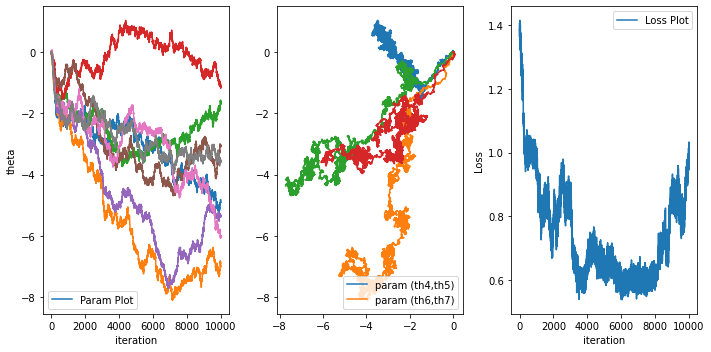

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')

axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[1].plot([item[4] for item in thdata],[item[5] for item in thdata],[item[6] for item in thdata],[item[7] for item in thdata])
axes[1].legend(['param (th4,th5)','param (th6,th7)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

In [8]:
def circuit1(qc,qr,theta,L,repeat):
    #circuit 1 
    #theta is list of the parameters
    #theta length is 8
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    
    if repeat!=0:
        qc.barrier(qr)    
    
        for l in range(L):

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1    
     
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
     
    return qc


def circuit2(qc,qr,theta,L,repeat):
    #circuit 2
    #theta is list of the parameters
    #theta length is 8L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.cx(qr[3],qr[2])
        qc.cx(qr[2],qr[1])
        qc.cx(qr[1],qr[0])
    
    
    if repeat!=0:    
        qc.barrier(qr)
        for l in range(L):
        
            qc.cx(qr[1],qr[0])
            qc.cx(qr[2],qr[1])
            qc.cx(qr[3],qr[2])
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit3(qc,qr,theta,L,repeat):
    #circuit 3
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:           
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1 
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit4(qc,qr,theta,L,repeat):
    #circuit 4
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat
    

    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 

    if repeat!=0:               
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1 
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1 
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc




def circuit5(qc,qr,theta,L,repeat):
    #circuit 5
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crz(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crz(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit6(qc,qr,theta,L,repeat):
    #circuit 6
    #theta is list of the parameters
    #theta length is (28)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        for j in range(4):
            for i in range(4):
                if i!=j:
                    qc.crx(theta[count],qr[3-j],qr[3-i])
                    count=count+1

 

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1     
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
        

            for j in range(4):
                for i in range(4):
                    if i!=j:
                        qc.crx(theta[count],qr[j],qr[i])
                        count=count+1
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit7(qc,qr,theta,L,repeat):
    #circuit 7
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1

        qc.crz(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crz(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crz(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc



def circuit8(qc,qr,theta,L,repeat):
    #circuit 8
    #theta is list of the parameters
    #theta length is (19)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1            

            
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1

        qc.crx(theta[count],qr[3],qr[2])
        count=count+1



        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1

        
        qc.crx(theta[count],qr[2],qr[1])    
        count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
        
            qc.crx(theta[count],qr[2],qr[1])    
            count=count+1
        
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1        
        
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
        
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1
        
        
        
    
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1         
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1                
     
    return qc


def circuit9(qc,qr,theta,L,repeat):
    #circuit 9
    #theta is list of the parameters
    #theta length is (4)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    for l in range(L):

        for i in range(4):
            qc.h(qr[i])

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
        
            
    if repeat!=0:             
        qc.barrier(qr)
    
        
        for l in range(L):
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1
                
            qc.cz(qr[1],qr[0]) 
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
            
                 
        
            for i in range(4):
                qc.h(qr[i])                  
     
    return qc







def circuit10(qc,qr,theta,L,repeat):
    #circuit 10
    #theta is list of the parameters
    #theta length is (4)L+4
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    
    


    count=0
    
    for i in range(4):
        qc.ry(theta[count],qr[i])
        count=count+1
    
    for l in range(L):

        qc.cz(qr[3],qr[2])
        qc.cz(qr[2],qr[1])
        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[0])



        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            qc.cz(qr[3],qr[0])            
            qc.cz(qr[1],qr[0])
            qc.cz(qr[2],qr[1])
            qc.cz(qr[3],qr[2])
        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
            
                 
              
     
    return qc




def circuit11(qc,qr,theta,L,repeat):
    #circuit 11
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cx(qr[1],qr[0])
        qc.cx(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cx(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cx(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cx(qr[3],qr[2])
            qc.cx(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc









def circuit12(qc,qr,theta,L,repeat):
    #circuit 12
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1
        
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1    
    

        qc.cz(qr[1],qr[0])
        qc.cz(qr[3],qr[2])



        qc.ry(theta[count],qr[1])
        count=count+1 
        qc.ry(theta[count],qr[2])
        count=count+1 
        qc.rz(theta[count],qr[1])
        count=count+1 
        qc.rz(theta[count],qr[2])
        count=count+1 
        qc.cz(qr[2],qr[1])
        
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
            qc.cz(qr[2],qr[1])
            
            qc.rz(theta[count],qr[2])
            count=count+1 
            qc.rz(theta[count],qr[1])
            count=count+1 
            qc.ry(theta[count],qr[2])
            count=count+1 
            qc.ry(theta[count],qr[1])
            count=count+1 
        
            qc.cz(qr[3],qr[2])
            qc.cz(qr[1],qr[0])
            
            
            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1            
            
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1            

                 
              
     
    return qc



def circuit13(qc,qr,theta,L,repeat):
    #circuit 13
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crz(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crz(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crz(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crz(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crz(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crz(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crz(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit14(qc,qr,theta,L,repeat):
    #circuit 14
    #theta is list of the parameters
    #theta length is (16)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.crx(theta[count],qr[3],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1 
  

        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.crx(theta[count],qr[3],qr[2])
        count=count+1 
        qc.crx(theta[count],qr[0],qr[3])
        count=count+1 
        qc.crx(theta[count],qr[1],qr[0])
        count=count+1 
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1 

            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.crx(theta[count],qr[2],qr[1])
            count=count+1 
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1                  
            qc.crx(theta[count],qr[0],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1           
            
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1         
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1 
        
            qc.crx(theta[count],qr[3],qr[0])
            count=count+1         
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc



def circuit15(qc,qr,theta,L,repeat):
    #circuit 15
    #theta is list of the parameters
    #theta length is (8)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1

        qc.cx(qr[3],qr[0])

        qc.cx(qr[2],qr[3])

        qc.cx(qr[1],qr[2])

        qc.cx(qr[0],qr[1])





        
        for i in range(4):
            qc.ry(theta[count],qr[i])
            count=count+1    


        qc.cx(qr[3],qr[2])

        qc.cx(qr[0],qr[3])

        qc.cx(qr[1],qr[0])

        qc.cx(qr[2],qr[1])
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         
            qc.cx(qr[2],qr[1])

            qc.cx(qr[1],qr[0])
              
            qc.cx(qr[0],qr[3])

        
            qc.cx(qr[3],qr[2])
      
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1    

            qc.cx(qr[0],qr[1])
             
            qc.cx(qr[1],qr[2])
      
            qc.cx(qr[2],qr[3])

        
            qc.cx(qr[3],qr[0])
     
        
            for i in range(4):
                qc.ry(theta[count],qr[i])
                count=count+1
            
            
    return qc




def circuit16(qc,qr,theta,L,repeat):
    #circuit 16
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crz(theta[count],qr[1],qr[0])
        count=count+1
        qc.crz(theta[count],qr[3],qr[2])
        count=count+1
        qc.crz(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crz(theta[count],qr[3],qr[2])
            count=count+1
            qc.crz(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc


    
def circuit17(qc,qr,theta,L,repeat):
    #circuit 17
    #theta is list of the parameters
    #theta length is (11)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):
        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    

        qc.crx(theta[count],qr[1],qr[0])
        count=count+1
        qc.crx(theta[count],qr[3],qr[2])
        count=count+1
        qc.crx(theta[count],qr[2],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[2],qr[1])
            count=count+1            
            qc.crx(theta[count],qr[3],qr[2])
            count=count+1
            qc.crx(theta[count],qr[1],qr[0])
            count=count+1

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc







def circuit18(qc,qr,theta,L,repeat):
    #circuit 18
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crz(theta[count],qr[3],qr[0])
        count=count+1
        qc.crz(theta[count],qr[2],qr[3])
        count=count+1
        qc.crz(theta[count],qr[1],qr[2])
        count=count+1
        qc.crz(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crz(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crz(theta[count],qr[1],qr[2])
            count=count+1
            qc.crz(theta[count],qr[2],qr[3])
            count=count+1

            qc.crz(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc



def circuit19(qc,qr,theta,L,repeat):
    #circuit 1
    #theta is list of the parameters
    #theta length is (12)L
    #L is the number of repeatation
    
    # repeat will conjugate the first part and add next the the circuit for expressibility
    # 0:No, 1: Repeat    

    count=0

    for l in range(L):

        for i in range(4):
            qc.rx(theta[count],qr[i])
            count=count+1
    
        for i in range(4):
            qc.rz(theta[count],qr[i])
            count=count+1
    


        qc.crx(theta[count],qr[3],qr[0])
        count=count+1
        qc.crx(theta[count],qr[2],qr[3])
        count=count+1
        qc.crx(theta[count],qr[1],qr[2])
        count=count+1
        qc.crx(theta[count],qr[0],qr[1])
        count=count+1
            
    if repeat!=0:             
        qc.barrier(qr)
        for l in range(L):
         

            qc.crx(theta[count],qr[0],qr[1])
            count=count+1          
            qc.crx(theta[count],qr[1],qr[2])
            count=count+1
            qc.crx(theta[count],qr[2],qr[3])
            count=count+1

            qc.crx(theta[count],qr[3],qr[0])
            count=count+1       

            for i in range(4):
                qc.rz(theta[count],qr[i])
                count=count+1
            for i in range(4):
                qc.rx(theta[count],qr[i])
                count=count+1

    return qc